In [1]:
import glob
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Eval v4 new

## Denoising MM v4 - Wav2Vec2 July 6th (v4_2 mod Chan)

In [2]:
identifier = 'v4'

In [3]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob(f'./save_mm_denoising_{identifier}/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append('mm_' + denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
mm_df = pd.DataFrame(result_buffer)

In [4]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob(f'./save_denoising_{identifier}/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [5]:
df = pd.concat([df, mm_df])

In [6]:
sort_key = { 
    'mm_gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'gt': 5, 'noisetasnet': 6, 'noisetas_fullsub': 7, 'fullsubnet': 8, 'mix': 9
}
proper_key = {
    'mm_gt': 'Clean (MM)', 
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

In [7]:
df.groupby('denoise_type')['cer'].mean()

denoise_type
fullsubnet             0.109511
gt                     0.078534
mix                    0.157592
mm_fullsubnet          0.060908
mm_gt                  0.038394
mm_mix                 0.093892
mm_noisetas_fullsub    0.064747
mm_noisetasnet         0.070157
noisetas_fullsub       0.127923
noisetasnet            0.135602
Name: cer, dtype: float64

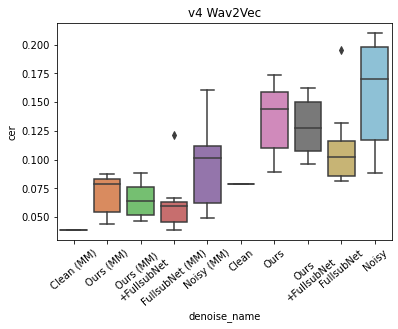

In [8]:
ax = sns.boxplot(x="denoise_name", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 40})
plt.title('v4 Wav2Vec')
plt.savefig(f'mm_asr_denoising_{identifier}.png', bbox_inches='tight')

/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


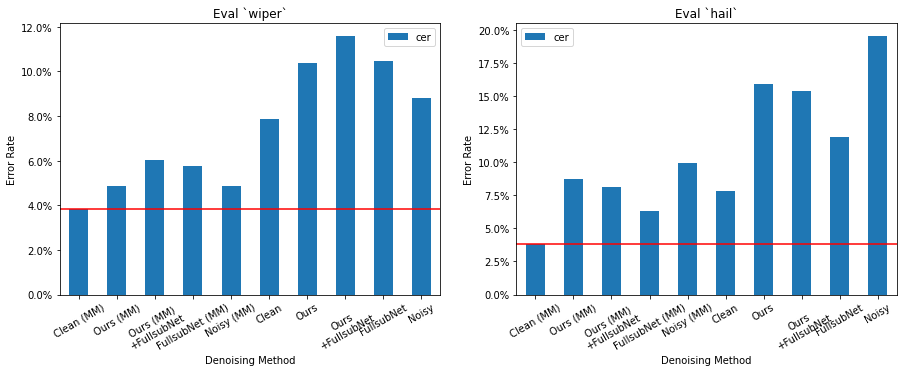

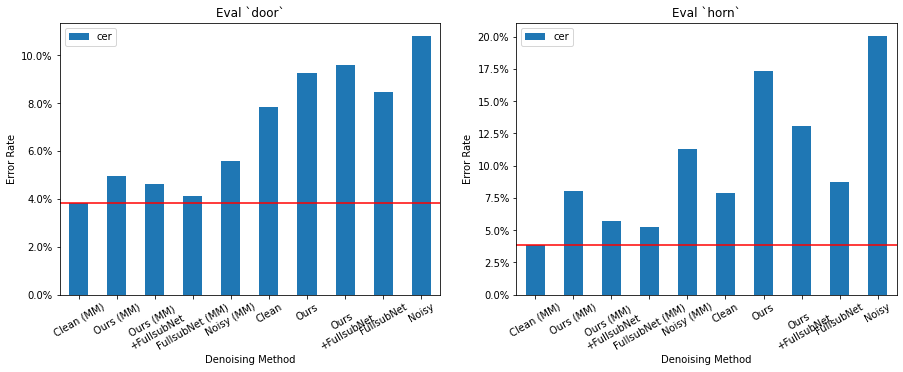

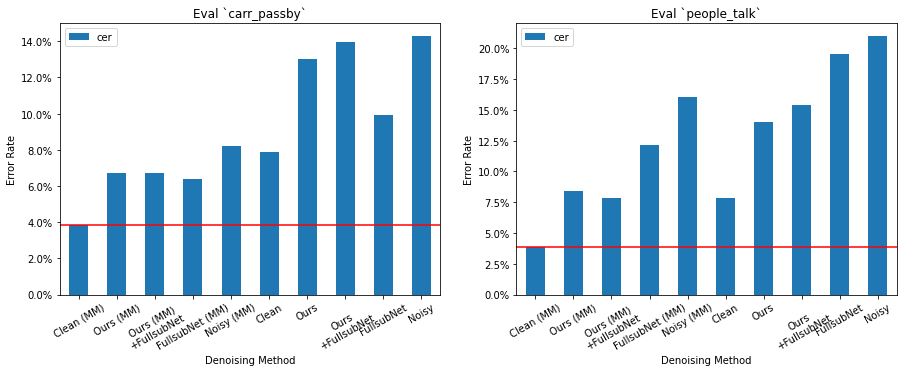

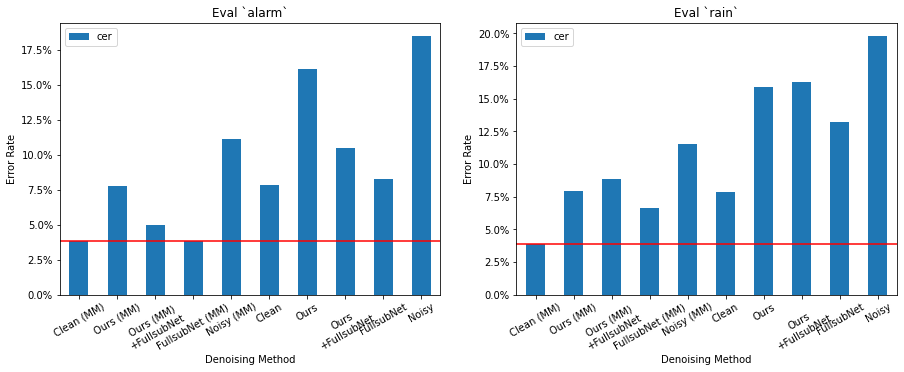

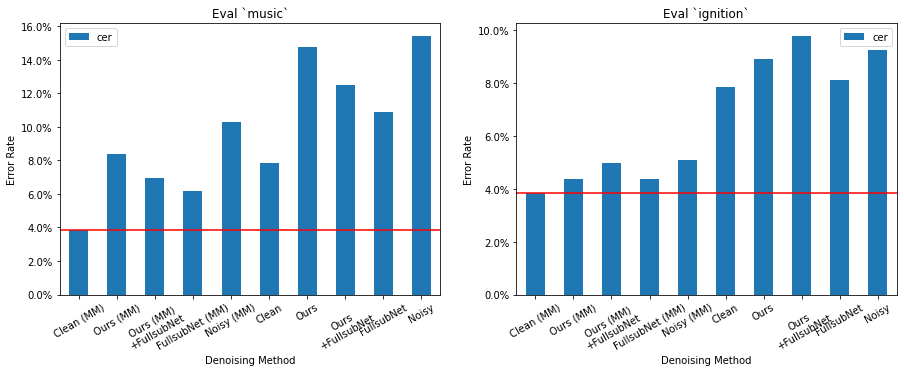

In [9]:
sort_key = { 
    'mm_gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'gt': 5, 'noisetasnet': 6, 'noisetas_fullsub': 7, 'fullsubnet': 8, 'mix': 9
}
proper_key = {
    'mm_gt': 'Clean (MM)',
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 30})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.038394, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        # plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

## Denoising MM v4i - Wav2Vec2 July 6th (v4_2 Chan)

In [10]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_mm_denoising_v4i/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append('mm_' + denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
mm_df = pd.DataFrame(result_buffer)

In [11]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_denoising_v4i/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [12]:
df = pd.concat([df, mm_df])

In [13]:
sort_key = { 
    'mm_gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'gt': 5, 'noisetasnet': 6, 'noisetas_fullsub': 7, 'fullsubnet': 8, 'mix': 9
}
proper_key = {
    'mm_gt': 'Clean (MM)', 
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

In [14]:
df.groupby('denoise_type')['cer'].mean()

denoise_type
fullsubnet             0.109511
gt                     0.078534
mix                    0.157592
mm_fullsubnet          0.060908
mm_gt                  0.038394
mm_mix                 0.093892
mm_noisetas_fullsub    0.063438
mm_noisetasnet         0.065881
noisetas_fullsub       0.122775
noisetasnet            0.130105
Name: cer, dtype: float64

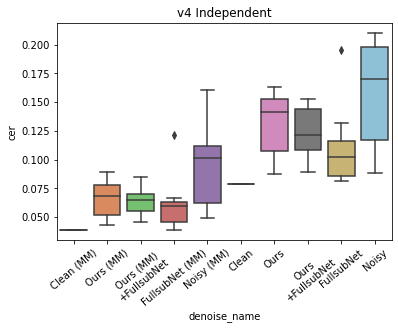

In [15]:
ax = sns.boxplot(x="denoise_name", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 40})
plt.title('v4 Independent')
plt.savefig(f'mm_asr_denoising_4i_mod.png', bbox_inches='tight')

/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


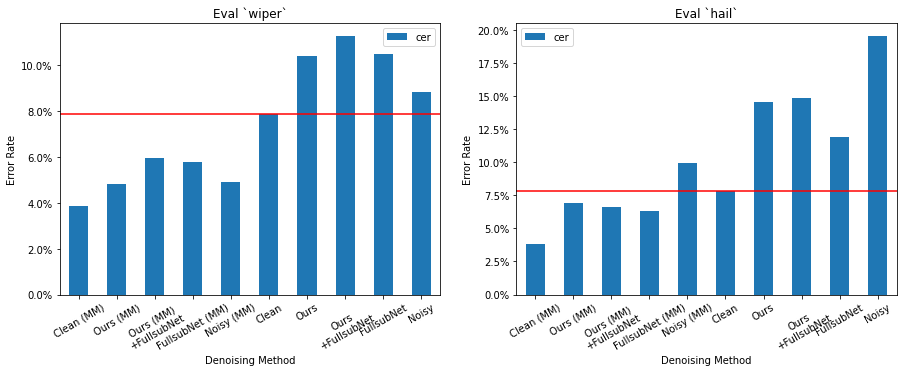

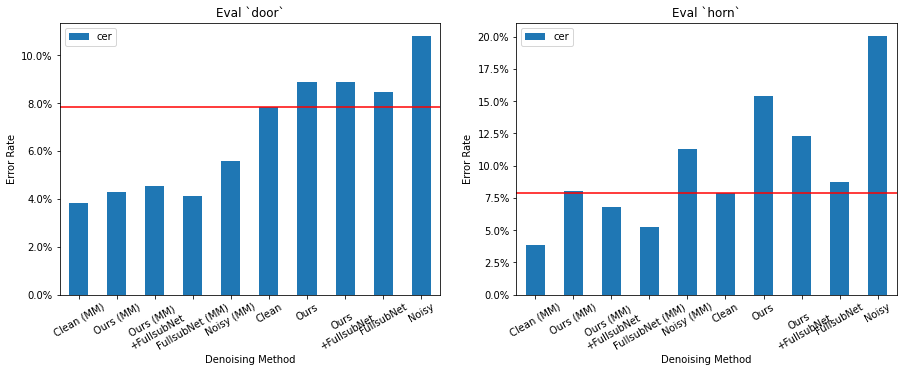

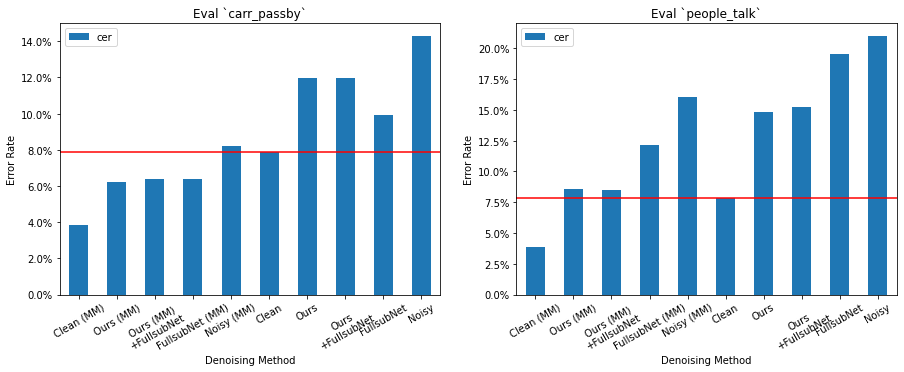

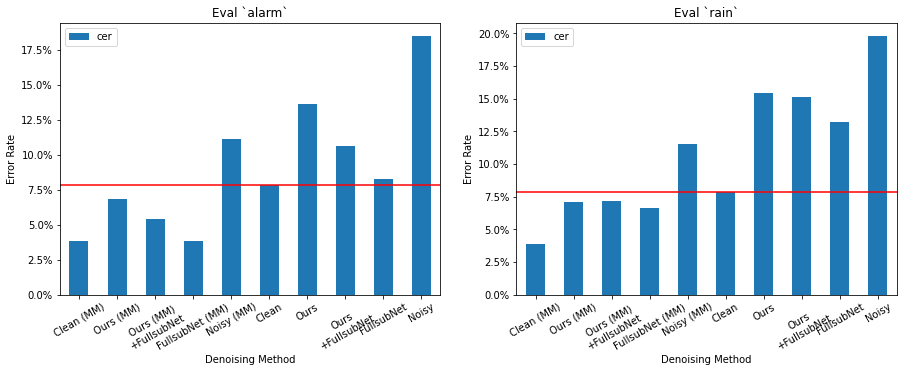

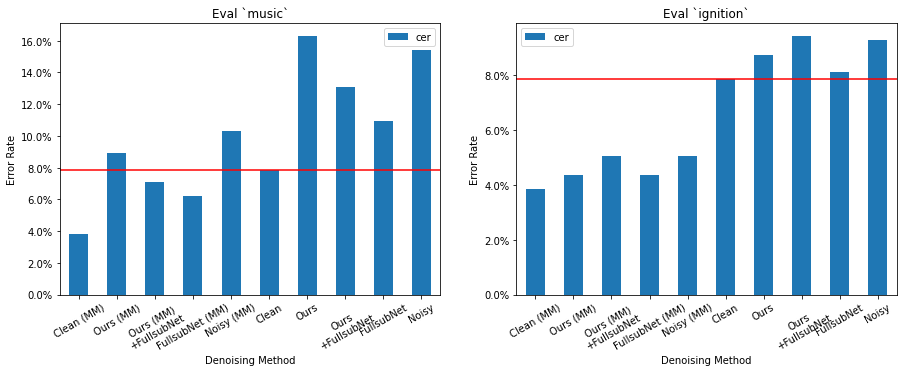

In [16]:
sort_key = { 
    'mm_gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'gt': 5, 'noisetasnet': 6, 'noisetas_fullsub': 7, 'fullsubnet': 8, 'mix': 9
}
proper_key = {
    'mm_gt': 'Clean (MM)',
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 30})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.078534, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        # plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

# Eval v3 mod

## Denoising MM v3 mod - Wav2Vec2 July 6th (v3 mod Chan)

In [17]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_mm_denoising_v3_mod/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append('mm_' + denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
mm_df = pd.DataFrame(result_buffer)

In [18]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_denoising_v3_mod/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [19]:
df = pd.concat([df, mm_df])

In [20]:
sort_key = { 
    'mm_gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'gt': 5, 'noisetasnet': 6, 'noisetas_fullsub': 7, 'fullsubnet': 8, 'mix': 9
}
proper_key = {
    'mm_gt': 'Clean (MM)', 
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

In [21]:
df.groupby('denoise_type')['cer'].mean()

denoise_type
fullsubnet             0.109511
gt                     0.078534
mix                    0.157592
mm_fullsubnet          0.060908
mm_gt                  0.038394
mm_mix                 0.093892
mm_noisetas_fullsub    0.068237
mm_noisetasnet         0.074607
noisetas_fullsub       0.133595
noisetasnet            0.148168
Name: cer, dtype: float64

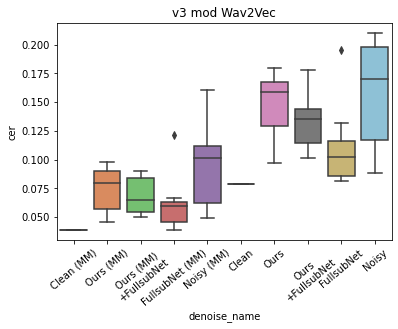

In [22]:
ax = sns.boxplot(x="denoise_name", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 40})
plt.title('v3 mod Wav2Vec')
plt.savefig(f'mm_asr_denoising_v3_mod.png', bbox_inches='tight')

/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


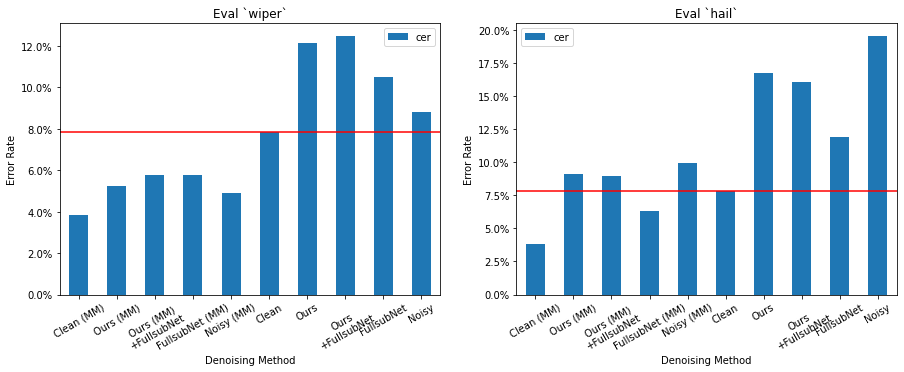

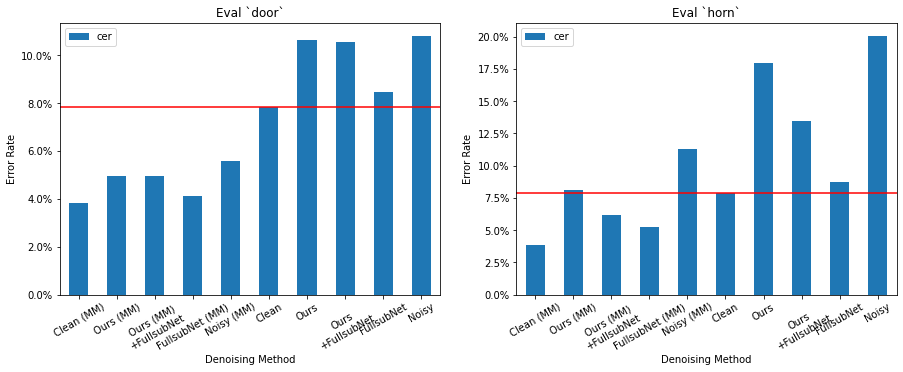

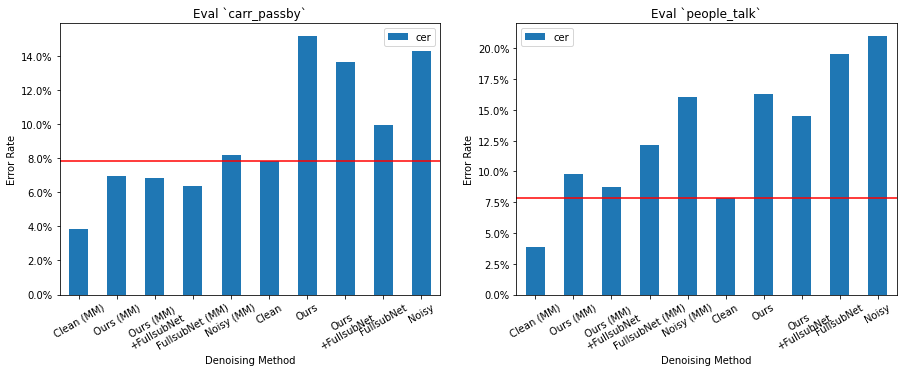

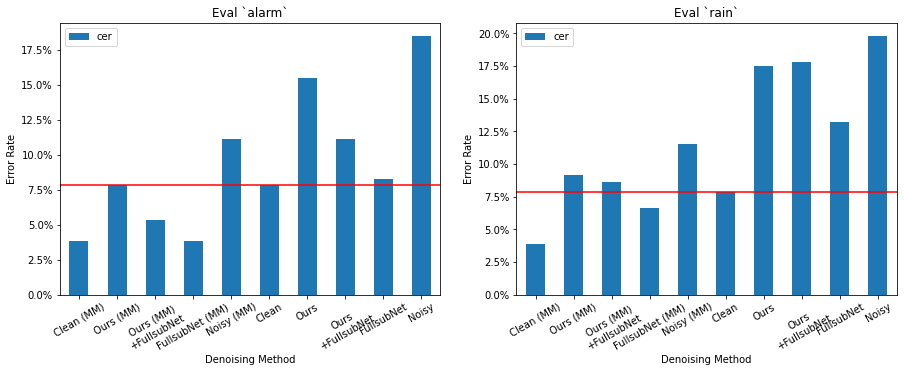

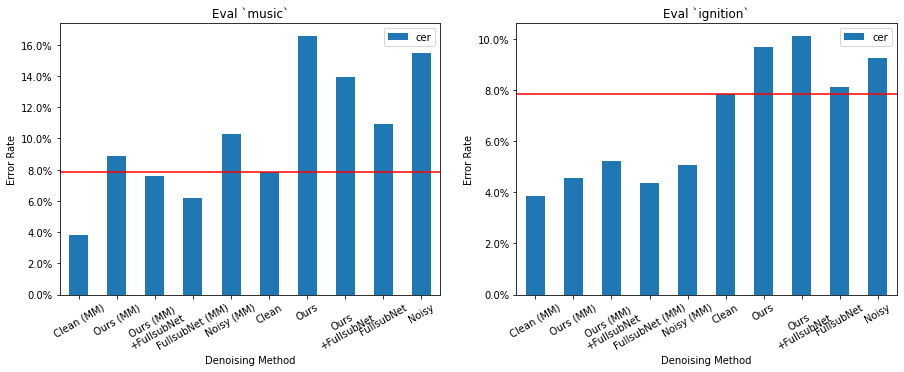

In [23]:
sort_key = { 
    'mm_gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'gt': 5, 'noisetasnet': 6, 'noisetas_fullsub': 7, 'fullsubnet': 8, 'mix': 9
}
proper_key = {
    'mm_gt': 'Clean (MM)',
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 30})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.078534, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        # plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

## Denoising MM v3i - Wav2Vec2 July 5th (v4 Chan)

In [24]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_mm_denoising_v3i_mod/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append('mm_' + denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
mm_df = pd.DataFrame(result_buffer)

In [25]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_denoising_v3i_mod/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [26]:
df = pd.concat([df, mm_df])

In [27]:
sort_key = { 
    'mm_gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'gt': 5, 'noisetasnet': 6, 'noisetas_fullsub': 7, 'fullsubnet': 8, 'mix': 9
}
proper_key = {
    'mm_gt': 'Clean (MM)', 
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

In [28]:
df.groupby('denoise_type')['cer'].mean()

denoise_type
fullsubnet             0.109511
gt                     0.078534
mix                    0.157592
mm_fullsubnet          0.060908
mm_gt                  0.038394
mm_mix                 0.093892
mm_noisetas_fullsub    0.067452
mm_noisetasnet         0.070681
noisetas_fullsub       0.130977
noisetasnet            0.140140
Name: cer, dtype: float64

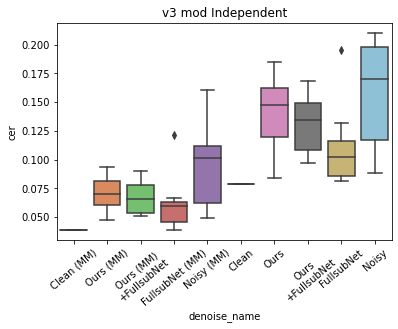

In [29]:
ax = sns.boxplot(x="denoise_name", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 40})
plt.title('v3 mod Independent')
plt.savefig(f'mm_asr_denoising_3i_mod.png', bbox_inches='tight')

/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


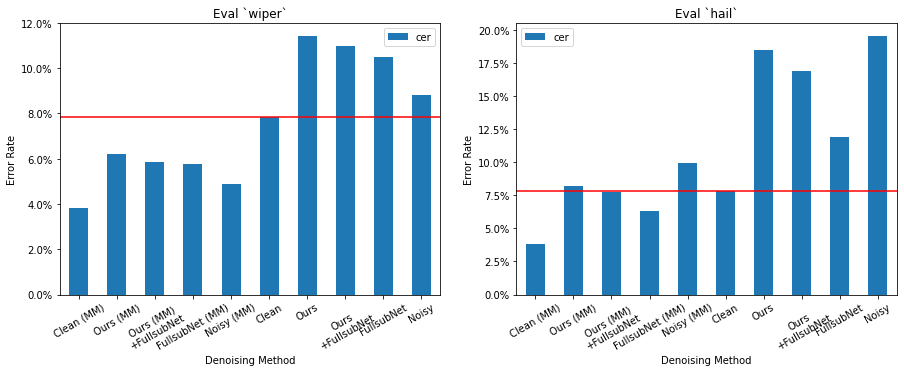

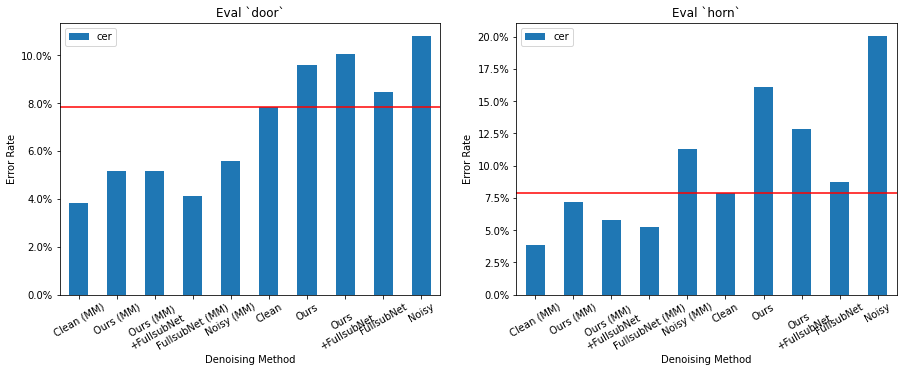

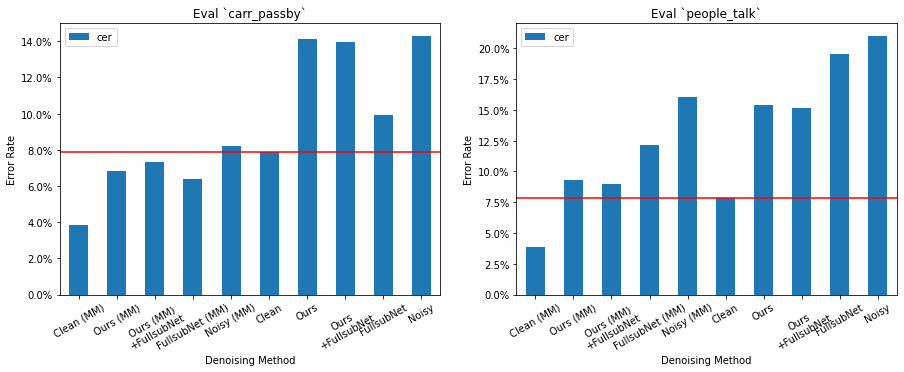

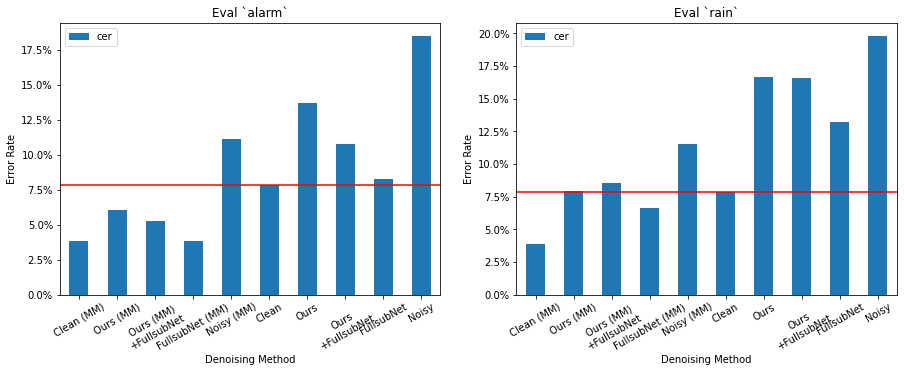

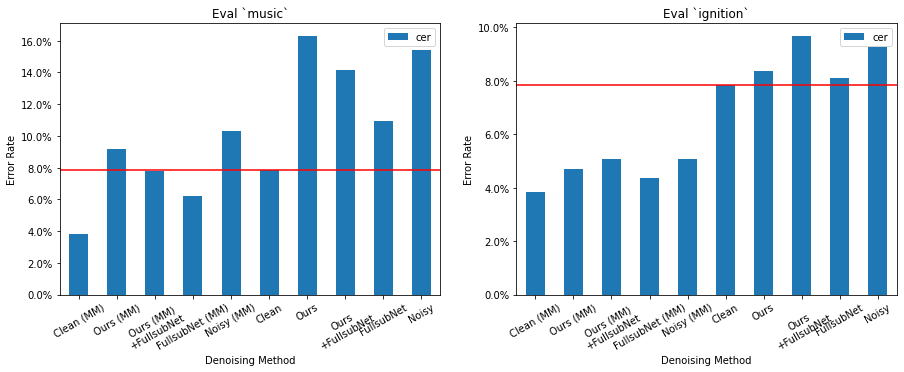

In [30]:
sort_key = { 
    'mm_gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'gt': 5, 'noisetasnet': 6, 'noisetas_fullsub': 7, 'fullsubnet': 8, 'mix': 9
}
proper_key = {
    'mm_gt': 'Clean (MM)',
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 30})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.078534, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        # plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

# Eval v8

## Denoising MM v8 - Wav2Vec2 July 5th (v4 Chan)

In [2]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_mm_denoising_v8/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append('mm_' + denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
mm_df = pd.DataFrame(result_buffer)

In [3]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_denoising_v8/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [4]:
df = pd.concat([df, mm_df])

In [5]:
# ci_avsr_df = pd.read_csv('ci-avsr-result.csv')
# mm_ci_avsr_df = ci_avsr_df.loc[ci_avsr_df['denoise_type'] == 'mix',['noise_type', 'denoise_type', 'mm_cer']].rename({'mm_cer': 'cer'}, axis=1)
# mm_ci_avsr_df['denoise_type'] = mm_ci_avsr_df['denoise_type'].apply(lambda x: 'mm_' + x)
# ao_ci_avsr_df = ci_avsr_df[['noise_type', 'denoise_type', 'cer']]

# df = pd.concat([df, mm_df, ao_ci_avsr_df, mm_ci_avsr_df])

In [6]:
sort_key = { 
    'mm_gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'gt': 5, 'noisetasnet': 6, 'noisetas_fullsub': 7, 'fullsubnet': 8, 'mix': 9
}
proper_key = {
    'mm_gt': 'Clean (MM)', 
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

In [7]:
df.groupby('denoise_type')['cer'].mean()

denoise_type
fullsubnet             0.097033
gt                     0.078534
mix                    0.130105
mm_fullsubnet          0.052182
mm_gt                  0.038394
mm_mix                 0.072862
mm_noisetas_fullsub    0.060122
mm_noisetasnet         0.063264
noisetas_fullsub       0.116841
noisetasnet            0.125393
Name: cer, dtype: float64

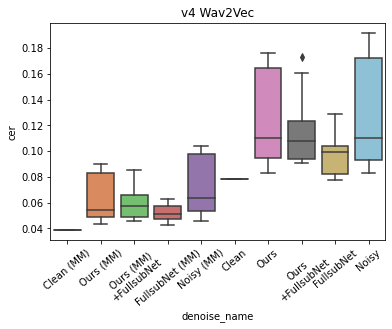

In [8]:
ax = sns.boxplot(x="denoise_name", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 40})
plt.title('v4 Wav2Vec')
plt.savefig(f'mm_asr_denoising_8.png', bbox_inches='tight')

/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


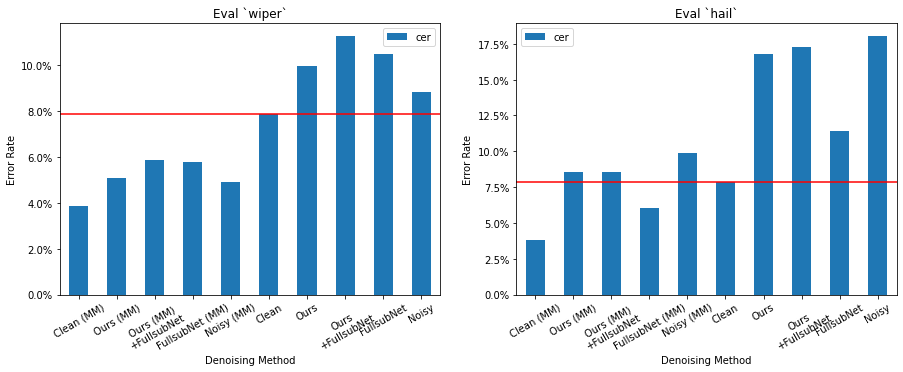

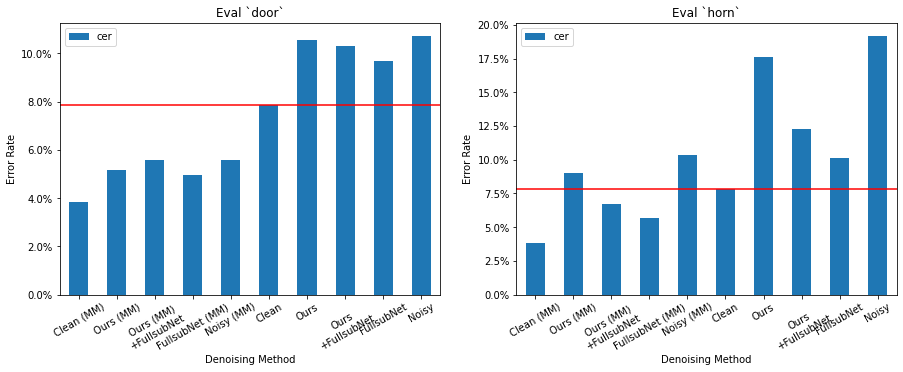

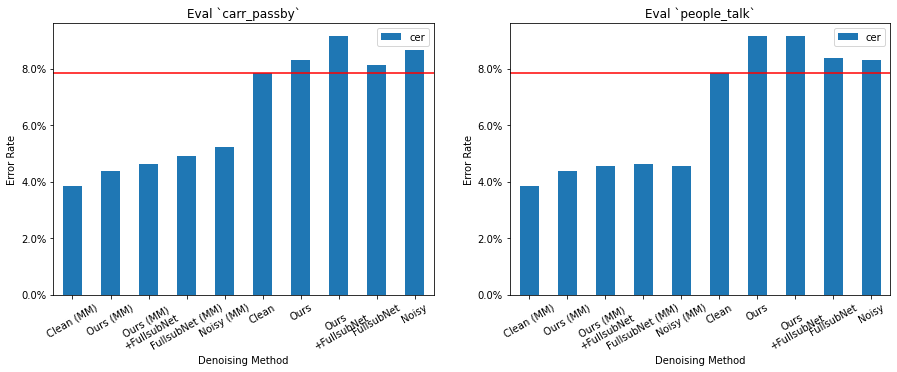

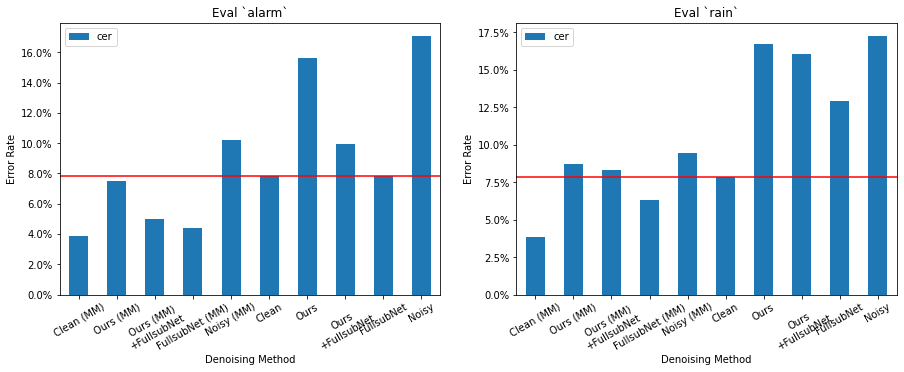

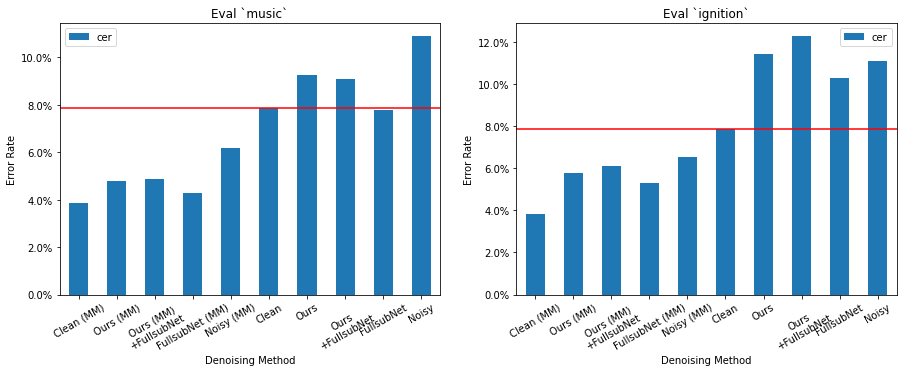

In [9]:
sort_key = { 
    'mm_gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'gt': 5, 'noisetasnet': 6, 'noisetas_fullsub': 7, 'fullsubnet': 8, 'mix': 9
}
proper_key = {
    'mm_gt': 'Clean (MM)',
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 30})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.078534, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        # plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

## Denoising MM v8i - Wav2Vec2 July 5th (v4 Chan)

In [10]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_mm_denoising_v8i/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append('mm_' + denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
mm_df = pd.DataFrame(result_buffer)

In [11]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_denoising_v8i/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [12]:
df = pd.concat([df, mm_df])

In [13]:
# ci_avsr_df = pd.read_csv('ci-avsr-result.csv')
# mm_ci_avsr_df = ci_avsr_df.loc[ci_avsr_df['denoise_type'] == 'mix',['noise_type', 'denoise_type', 'mm_cer']].rename({'mm_cer': 'cer'}, axis=1)
# mm_ci_avsr_df['denoise_type'] = mm_ci_avsr_df['denoise_type'].apply(lambda x: 'mm_' + x)
# ao_ci_avsr_df = ci_avsr_df[['noise_type', 'denoise_type', 'cer']]

# df = pd.concat([df, mm_df, ao_ci_avsr_df, mm_ci_avsr_df])

In [14]:
sort_key = { 
    'mm_gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'gt': 5, 'noisetasnet': 6, 'noisetas_fullsub': 7, 'fullsubnet': 8, 'mix': 9
}
proper_key = {
    'mm_gt': 'Clean (MM)', 
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

In [15]:
df.groupby('denoise_type')['cer'].mean()

denoise_type
fullsubnet             0.097033
gt                     0.078534
mix                    0.130105
mm_fullsubnet          0.052182
mm_gt                  0.038394
mm_mix                 0.072862
mm_noisetas_fullsub    0.057853
mm_noisetasnet         0.060471
noisetas_fullsub       0.115271
noisetasnet            0.121030
Name: cer, dtype: float64

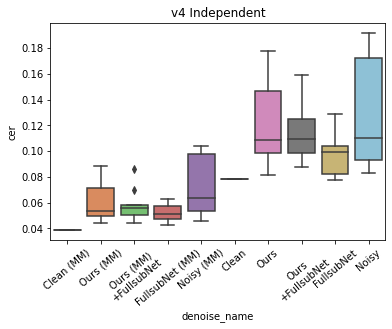

In [16]:
ax = sns.boxplot(x="denoise_name", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 40})
plt.title('v4 Independent')
plt.savefig(f'mm_asr_denoising_8i.png', bbox_inches='tight')

/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


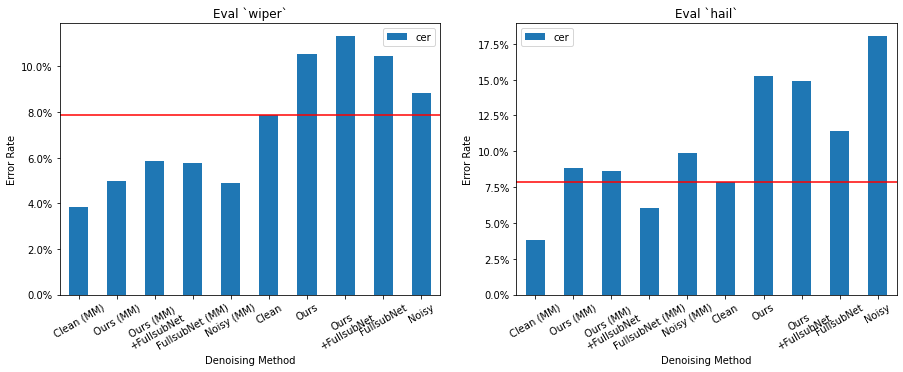

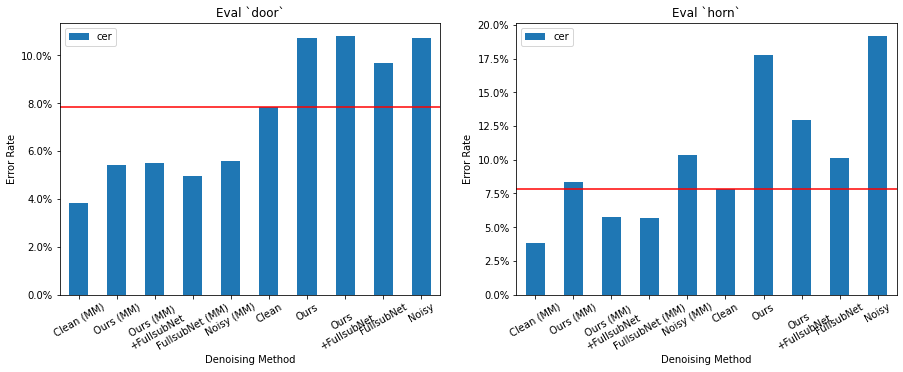

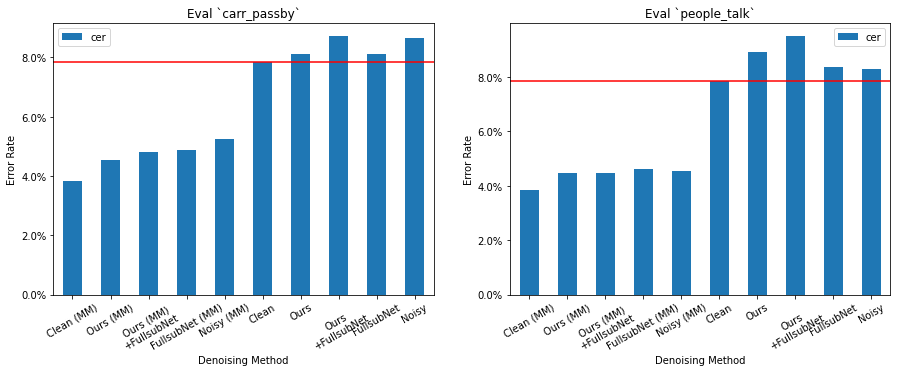

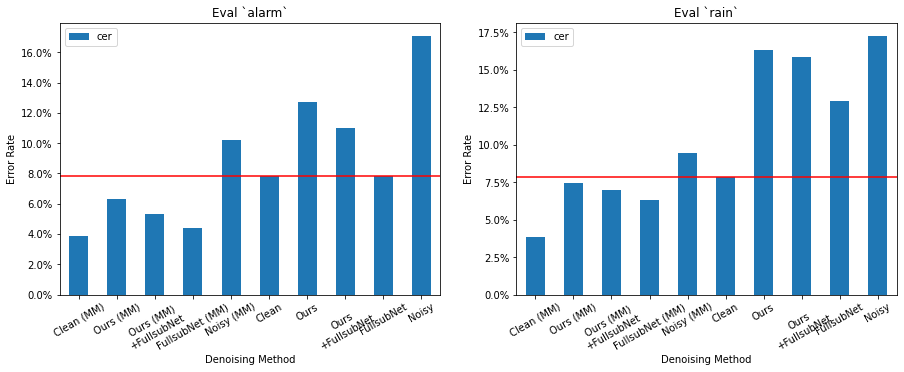

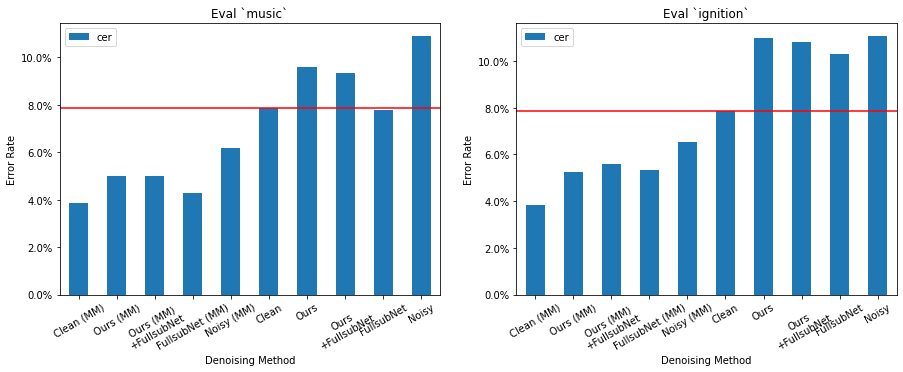

In [17]:
sort_key = { 
    'mm_gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'gt': 5, 'noisetasnet': 6, 'noisetas_fullsub': 7, 'fullsubnet': 8, 'mix': 9
}
proper_key = {
    'mm_gt': 'Clean (MM)',
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 30})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.078534, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        # plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

# Eval v7

## Denoising MM v7 - Wav2Vec2 June 29th

In [32]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_mm_denoising_v7/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append('mm_' + denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
mm_df = pd.DataFrame(result_buffer)

In [33]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_denoising_v7/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [34]:
ci_avsr_df = pd.read_csv('ci-avsr-result.csv')
mm_ci_avsr_df = ci_avsr_df.loc[ci_avsr_df['denoise_type'] == 'mix',['noise_type', 'denoise_type', 'mm_cer']].rename({'mm_cer': 'cer'}, axis=1)
mm_ci_avsr_df['denoise_type'] = mm_ci_avsr_df['denoise_type'].apply(lambda x: 'mm_' + x)
ao_ci_avsr_df = ci_avsr_df[['noise_type', 'denoise_type', 'cer']]

df = pd.concat([df, mm_df, ao_ci_avsr_df, mm_ci_avsr_df])

In [35]:
sort_key = { 
    'gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'noisetasnet': 5, 'noisetas_fullsub': 6, 'fullsubnet': 7, 'mix': 8
}
proper_key = {
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

In [36]:
df.groupby('denoise_type')['cer'].mean()

denoise_type
fullsubnet             0.082222
gt                     0.040600
mix                    0.143380
mm_fullsubnet          0.053264
mm_mix                 0.079950
mm_noisetas_fullsub    0.062986
mm_noisetasnet         0.066667
noisetas_fullsub       0.097639
noisetasnet            0.110625
Name: cer, dtype: float64

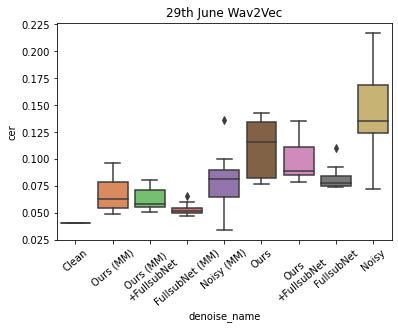

In [31]:
ax = sns.boxplot(x="denoise_name", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 40})
plt.title('29th June Wav2Vec')
plt.savefig(f'mm_asr_denoising_7.png', bbox_inches='tight')

/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


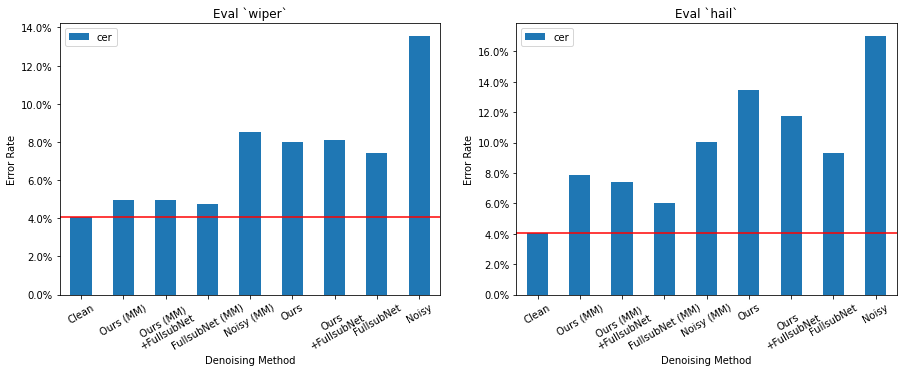

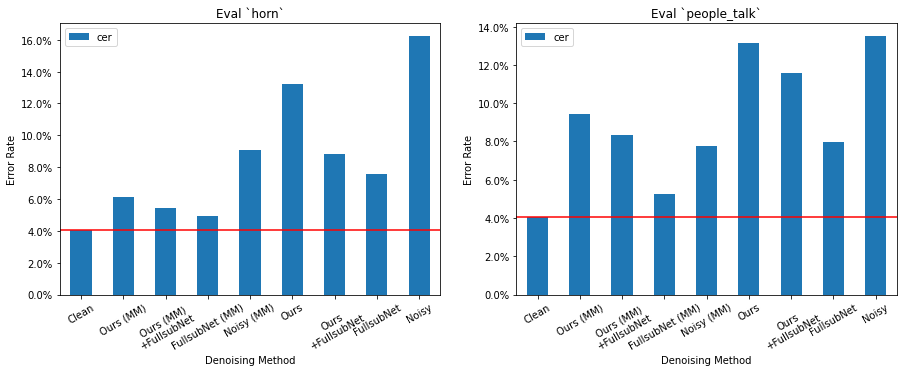

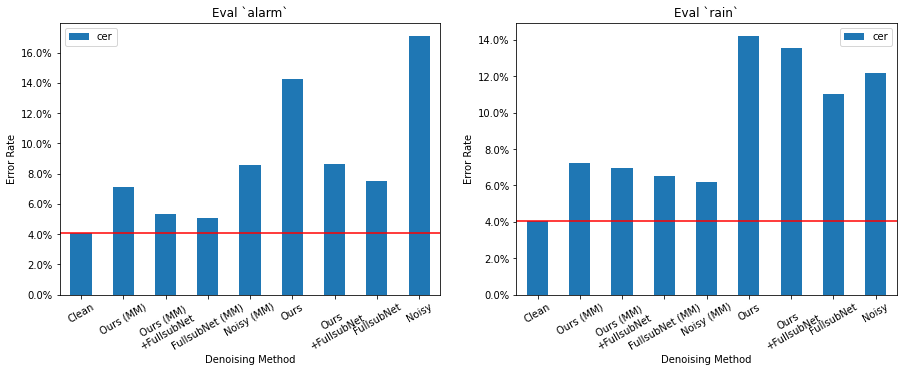

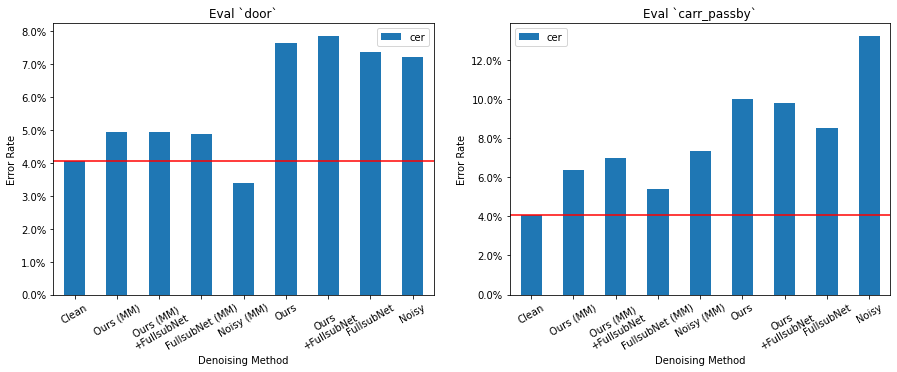

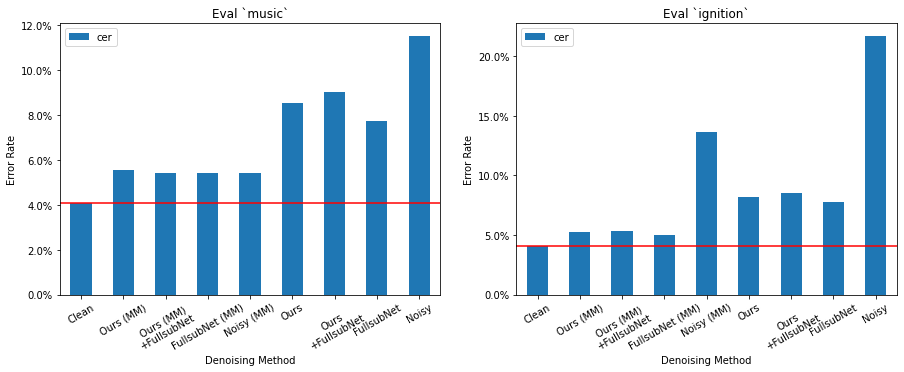

In [8]:
sort_key = { 
    'gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'noisetasnet': 5, 'noisetas_fullsub': 6, 'fullsubnet': 7, 'mix': 8
}
proper_key = {
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 30})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.0406, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        # plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

# Eval v5

## Denoising MM v5 - Wav2Vec2 June 27th (v5 Chan)

In [19]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_mm_denoising_v5/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append('mm_' + denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
mm_df = pd.DataFrame(result_buffer)

In [20]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_denoising_v5/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [21]:
ci_avsr_df = pd.read_csv('ci-avsr-result.csv')
mm_ci_avsr_df = ci_avsr_df.loc[ci_avsr_df['denoise_type'] == 'mix',['noise_type', 'denoise_type', 'mm_cer']].rename({'mm_cer': 'cer'}, axis=1)
mm_ci_avsr_df['denoise_type'] = mm_ci_avsr_df['denoise_type'].apply(lambda x: 'mm_' + x)
ao_ci_avsr_df = ci_avsr_df[['noise_type', 'denoise_type', 'cer']]

df = pd.concat([df, mm_df, ao_ci_avsr_df, mm_ci_avsr_df])

In [22]:
sort_key = { 
    'gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'noisetasnet': 5, 'noisetas_fullsub': 6, 'fullsubnet': 7, 'mix': 8
}
proper_key = {
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

In [23]:
df.groupby('denoise_type')['cer'].mean()

denoise_type
fullsubnet             0.082222
gt                     0.040600
mix                    0.143380
mm_fullsubnet          0.053264
mm_mix                 0.079950
mm_noisetas_fullsub    0.061111
mm_noisetasnet         0.064722
noisetas_fullsub       0.097639
noisetasnet            0.110625
Name: cer, dtype: float64

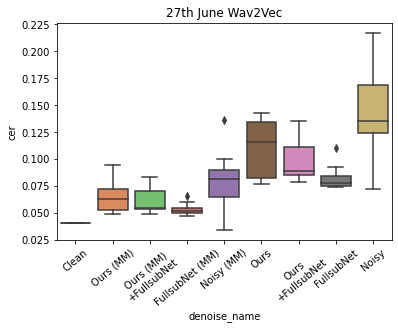

In [18]:
ax = sns.boxplot(x="denoise_name", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 40})
plt.title('27th June Wav2Vec')
plt.savefig(f'mm_asr_denoising_5.png', bbox_inches='tight')

/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


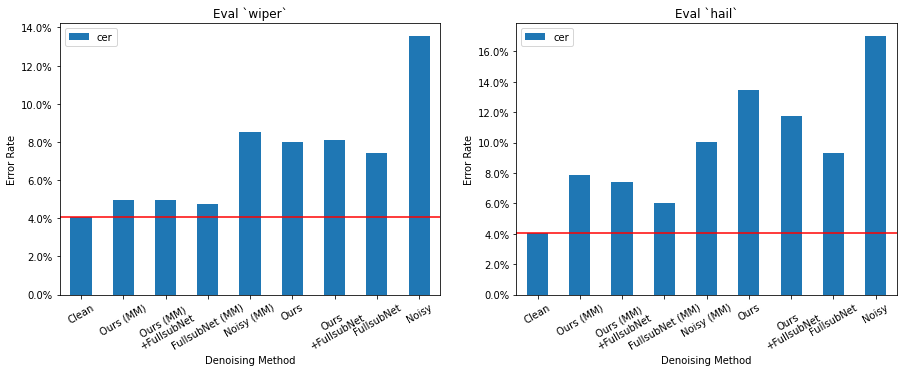

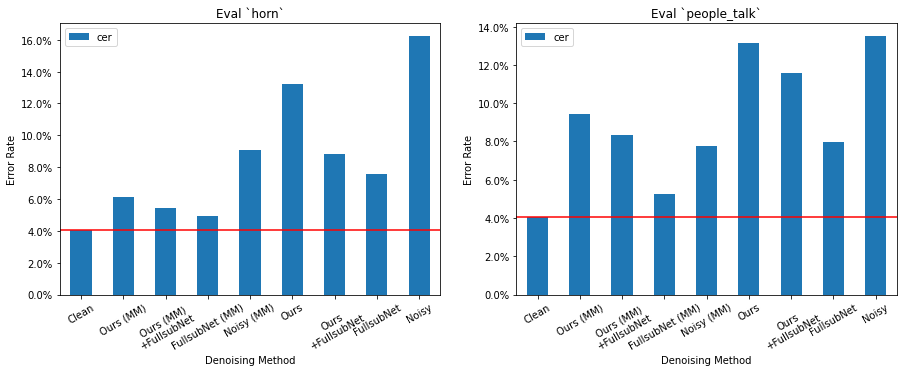

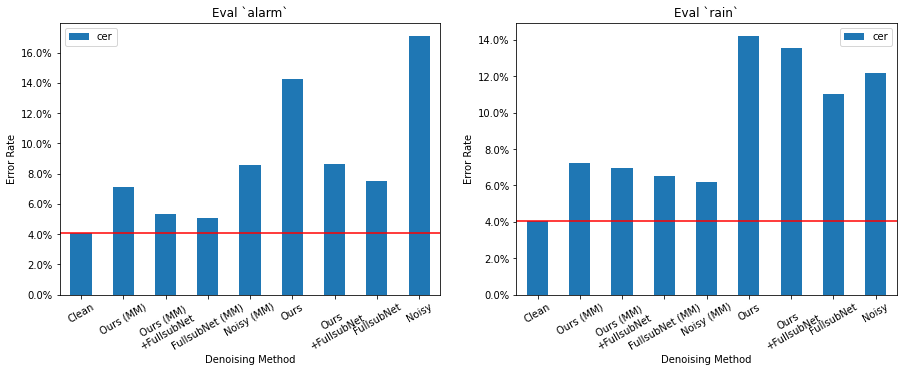

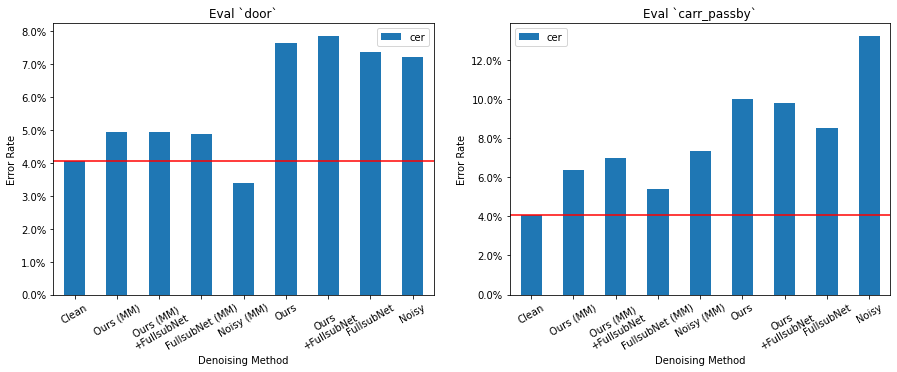

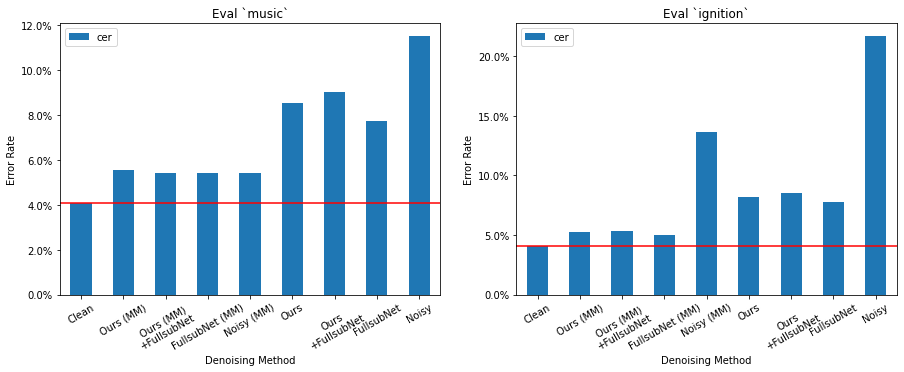

In [8]:
sort_key = { 
    'gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'noisetasnet': 5, 'noisetas_fullsub': 6, 'fullsubnet': 7, 'mix': 8
}
proper_key = {
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 30})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.0406, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        # plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

# Eval v4

## Denoising MM v4i - Wav2Vec2 June 21th (v4 Chan)

In [9]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_mm_denoising_v4i/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append('mm_' + denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
mm_df = pd.DataFrame(result_buffer)

In [10]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_denoising_v4i/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [11]:
ci_avsr_df = pd.read_csv('ci-avsr-result.csv')
mm_ci_avsr_df = ci_avsr_df.loc[ci_avsr_df['denoise_type'] == 'mix',['noise_type', 'denoise_type', 'mm_cer']].rename({'mm_cer': 'cer'}, axis=1)
mm_ci_avsr_df['denoise_type'] = mm_ci_avsr_df['denoise_type'].apply(lambda x: 'mm_' + x)
ao_ci_avsr_df = ci_avsr_df[['noise_type', 'denoise_type', 'cer']]

df = pd.concat([df, mm_df, ao_ci_avsr_df, mm_ci_avsr_df])

In [12]:
df.groupby('denoise_type')['cer'].mean()

denoise_type
fullsubnet             0.082222
gt                     0.040600
mix                    0.143380
mm_fullsubnet          0.053264
mm_mix                 0.079950
mm_noisetas_fullsub    0.062986
mm_noisetasnet         0.065764
noisetas_fullsub       0.096458
noisetasnet            0.108611
Name: cer, dtype: float64

In [21]:
sort_key = { 
    'gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'noisetasnet': 5, 'noisetas_fullsub': 6, 'fullsubnet': 7, 'mix': 8
}
proper_key = {
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

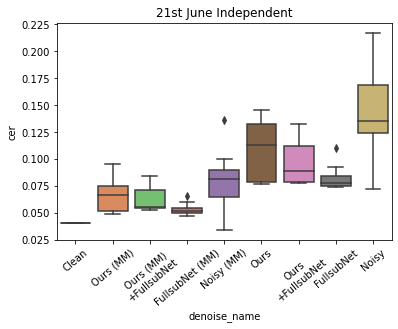

In [22]:
ax = sns.boxplot(x="denoise_name", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 40})
plt.title('21st June Independent')
plt.savefig(f'mm_asr_denoising_4i.png', bbox_inches='tight')

/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


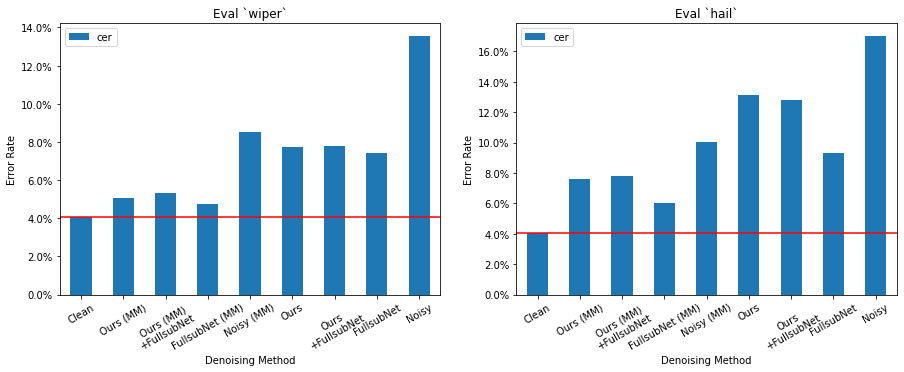

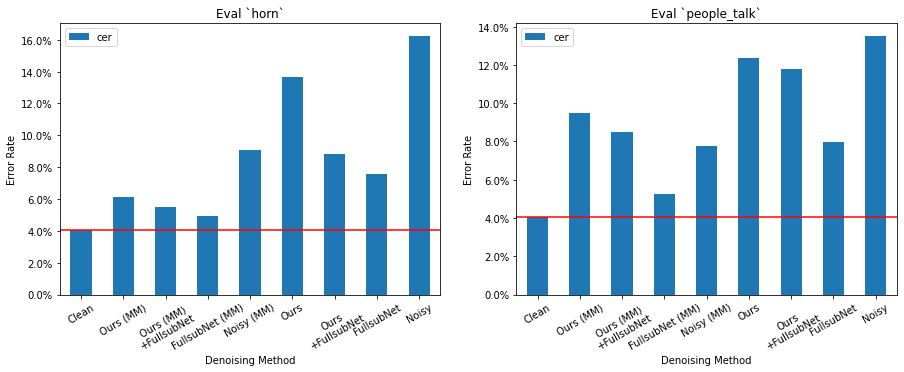

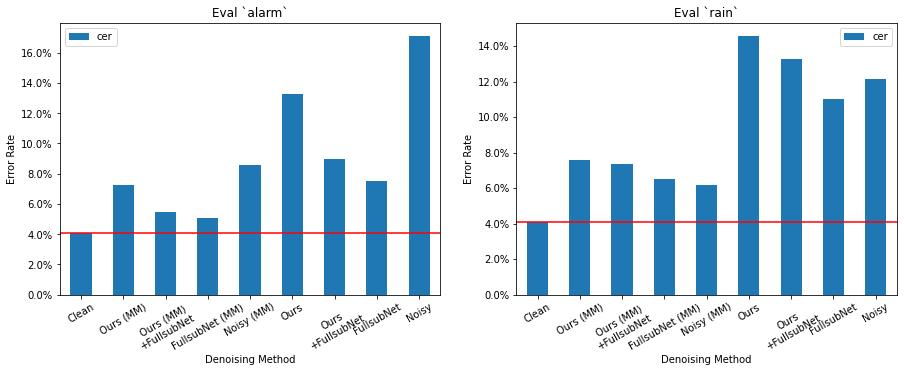

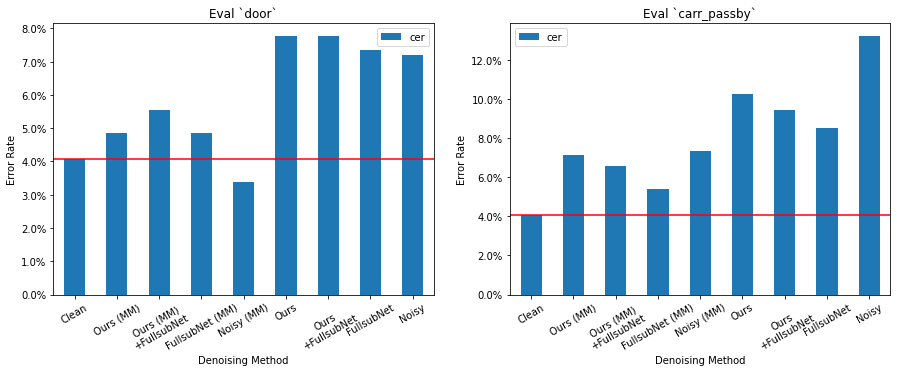

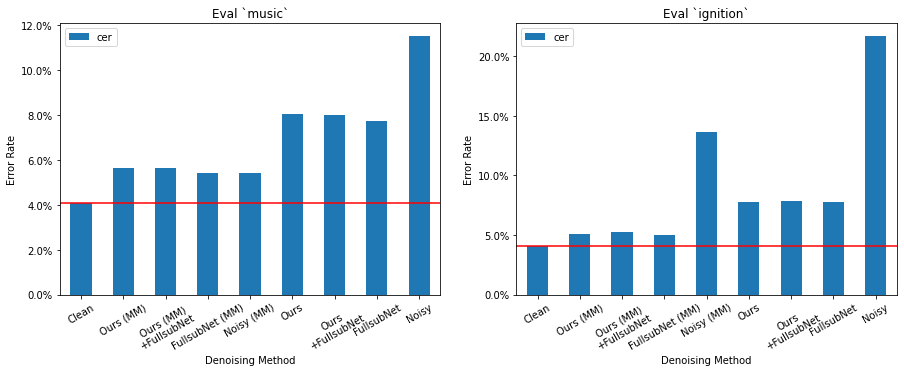

In [23]:
sort_key = { 
    'gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'noisetasnet': 5, 'noisetas_fullsub': 6, 'fullsubnet': 7, 'mix': 8
}
proper_key = {
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 30})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.0406, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        # plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

## Denoising MM v4 - Wav2Vec2 June 21th (v4 Chan)

In [24]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_mm_denoising_v4/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append('mm_' + denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
mm_df = pd.DataFrame(result_buffer)

In [25]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_denoising_v4/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetasnet_fullsubnet' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [26]:
ci_avsr_df = pd.read_csv('ci-avsr-result.csv')
mm_ci_avsr_df = ci_avsr_df.loc[ci_avsr_df['denoise_type'] == 'mix',['noise_type', 'denoise_type', 'mm_cer']].rename({'mm_cer': 'cer'}, axis=1)
mm_ci_avsr_df['denoise_type'] = mm_ci_avsr_df['denoise_type'].apply(lambda x: 'mm_' + x)
ao_ci_avsr_df = ci_avsr_df[['noise_type', 'denoise_type', 'cer']]

df = pd.concat([df, mm_df, ao_ci_avsr_df, mm_ci_avsr_df])

In [27]:
df.groupby('denoise_type')['cer'].mean()

denoise_type
fullsubnet             0.082222
gt                     0.040600
mix                    0.143380
mm_fullsubnet          0.053264
mm_mix                 0.079950
mm_noisetas_fullsub    0.060069
mm_noisetasnet         0.065417
noisetas_fullsub       0.095486
noisetasnet            0.106319
Name: cer, dtype: float64

In [28]:
sort_key = { 
    'gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'noisetasnet': 5, 'noisetas_fullsub': 6, 'fullsubnet': 7, 'mix': 8
}
proper_key = {
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

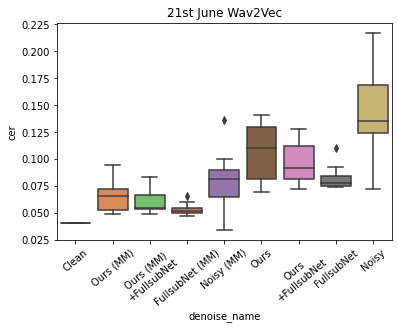

In [29]:
ax = sns.boxplot(x="denoise_name", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 40})
plt.title('21st June Wav2Vec')
plt.savefig(f'mm_asr_denoising_4.png', bbox_inches='tight')

/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


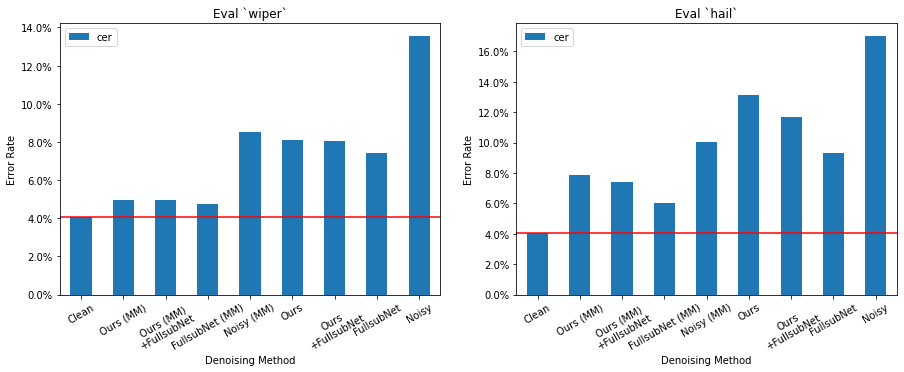

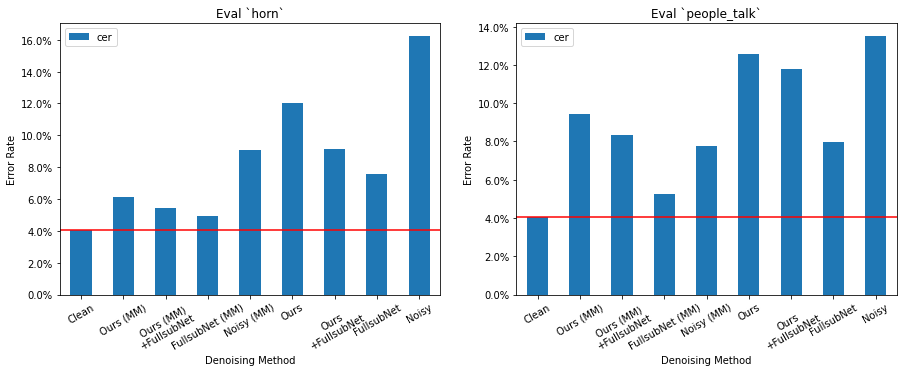

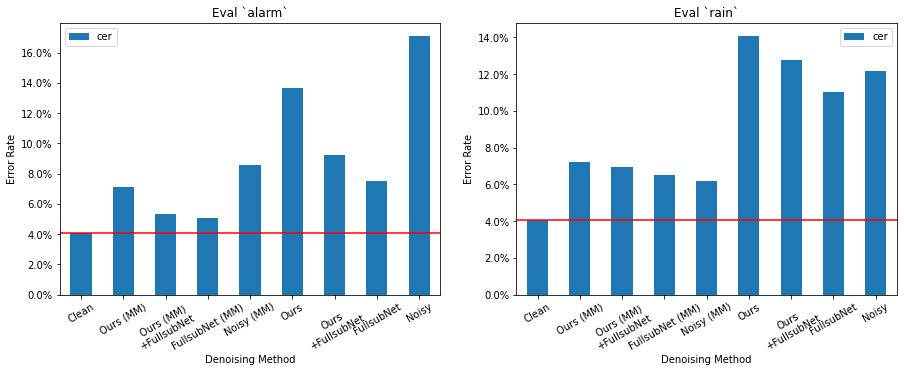

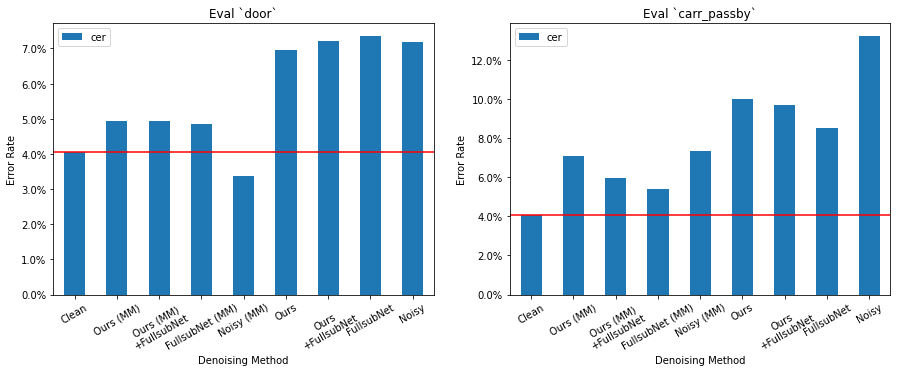

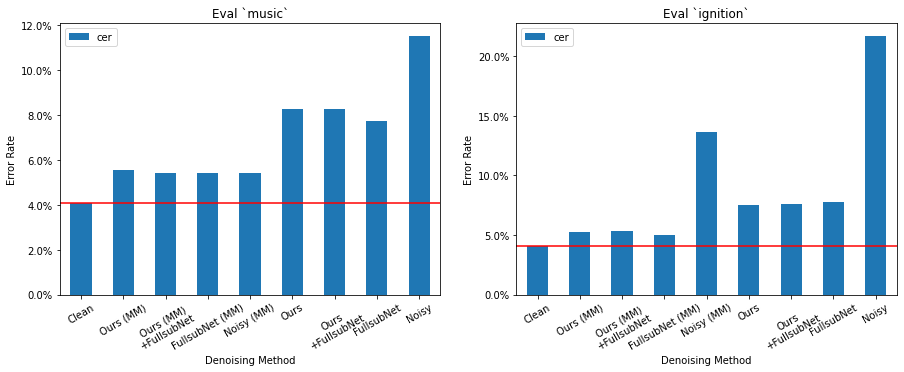

In [30]:
sort_key = { 
    'gt': 0, 'mm_noisetasnet': 1, 'mm_noisetas_fullsub': 2, 'mm_fullsubnet': 3, 'mm_mix': 4, 
    'noisetasnet': 5, 'noisetas_fullsub': 6, 'fullsubnet': 7, 'mix': 8
}
proper_key = {
    'gt': 'Clean', 
    'mm_noisetasnet': 'Ours (MM)', 
    'noisetasnet': 'Ours', 
    'mm_noisetas_fullsub': 'Ours (MM)\n+FullsubNet',
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'mm_fullsubnet': 'FullsubNet (MM)',
    'fullsubnet': 'FullsubNet',
    'mm_mix': 'Noisy (MM)',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 30})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.0406, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        # plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

# Eval v3

### Denoising MM v3i - Wav2Vec2 June 17th (v3 Chan)

In [2]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_mm_denoising_v3i/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetas_fullsub' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [3]:
ci_avsr_df = pd.read_csv('ci-avsr-result.csv')
ci_avsr_df = ci_avsr_df[['noise_type', 'denoise_type', 'mm_cer']].rename({'mm_cer': 'cer'}, axis=1)
df = pd.concat([df, ci_avsr_df])

In [4]:
sort_key = { 'gt': 0, 'noisetasnet': 1, 'noisetas_fullsub': 2, 'fullsubnet': 3, 'mix': 4 }
proper_key = {
    'gt': 'Clean', 
    'noisetasnet': 'Ours', 
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'fullsubnet': 'FullsubNet',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

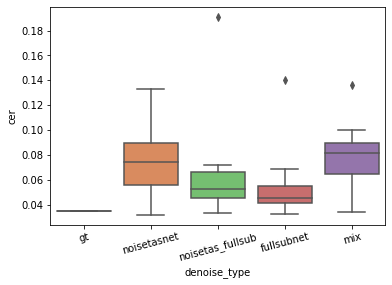

In [5]:
ax = sns.boxplot(x="denoise_type", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 15})
plt.savefig(f'mm_asr_denoising_3i.png', bbox_inches='tight')

/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


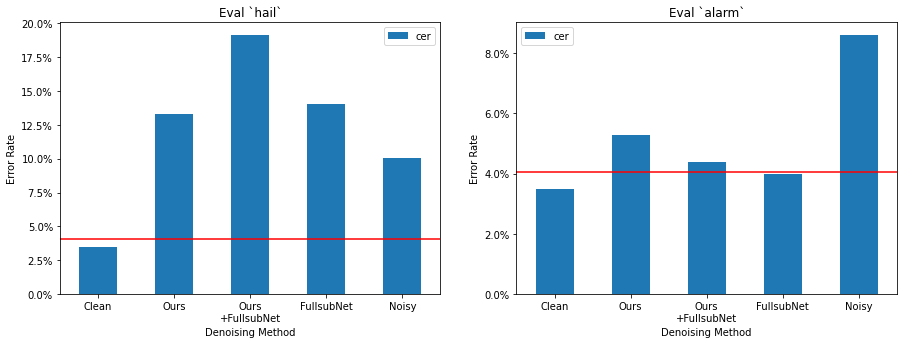

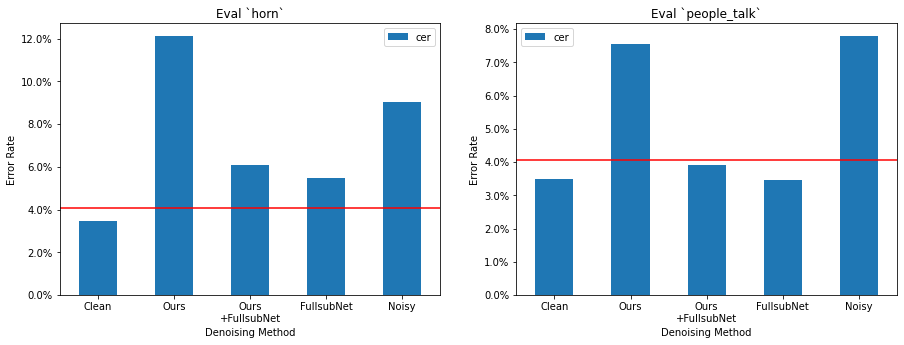

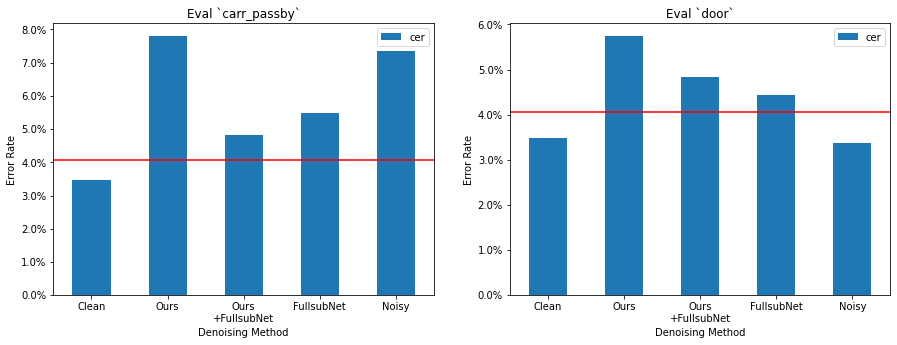

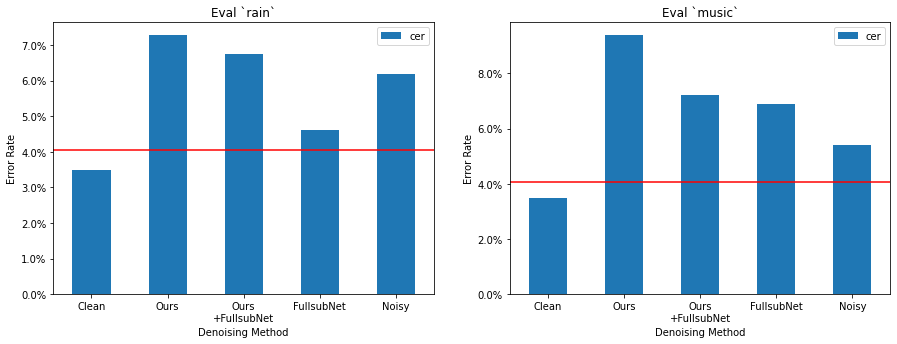

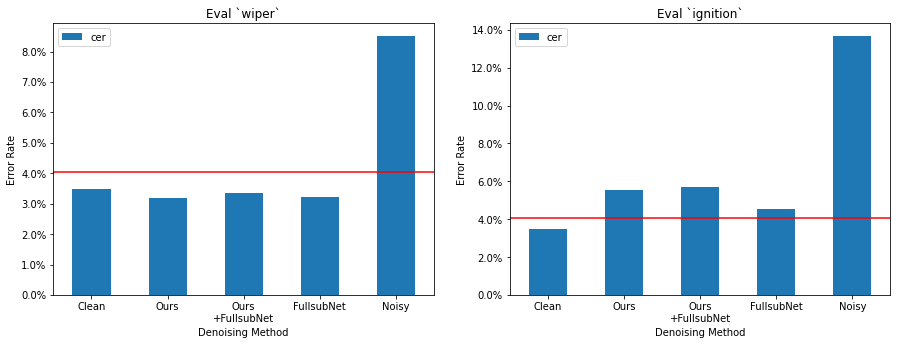

In [6]:
sort_key = { 'gt': 0, 'noisetasnet': 1, 'noisetas_fullsub': 2, 'fullsubnet': 3, 'mix': 4 }
proper_key = {
    'gt': 'Clean', 
    'noisetasnet': 'Ours', 
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'fullsubnet': 'FullsubNet',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 0})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.0406, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        # plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

### Denoising v3i - Wav2Vec2 June 17th (v3 Chan)

In [7]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_denoising_v3i/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetas_fullsub' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [8]:
ci_avsr_df = pd.read_csv('ci-avsr-result.csv')
df = pd.concat([df, ci_avsr_df])

In [9]:
sort_key = { 'gt': 0, 'noisetasnet': 1, 'noisetas_fullsub': 2, 'fullsubnet': 3, 'mix': 4 }
proper_key = {
    'gt': 'Clean', 
    'noisetasnet': 'Ours', 
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'fullsubnet': 'FullsubNet',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

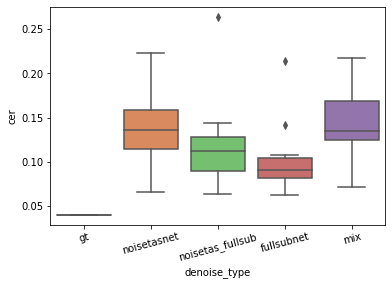

In [10]:
ax = sns.boxplot(x="denoise_type", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 15})
plt.savefig(f'ao_asr_denoising_3i.png', bbox_inches='tight')

/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


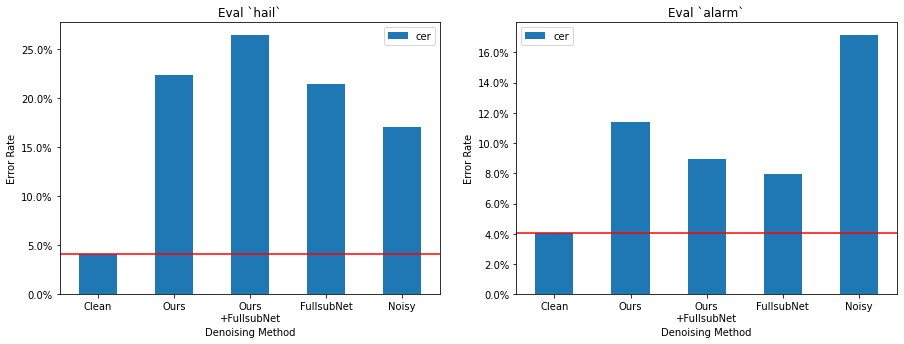

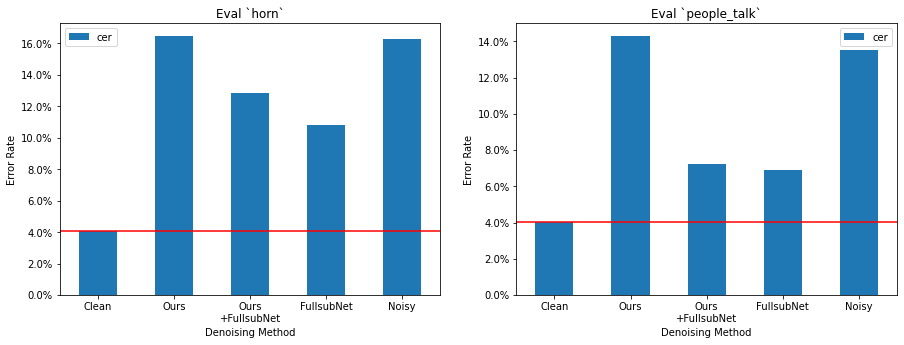

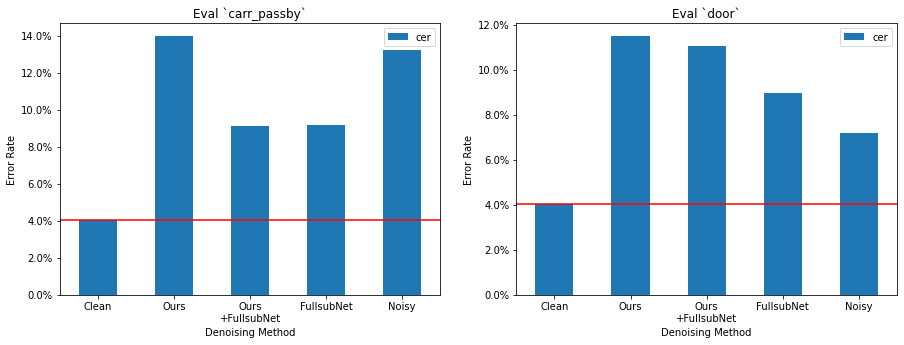

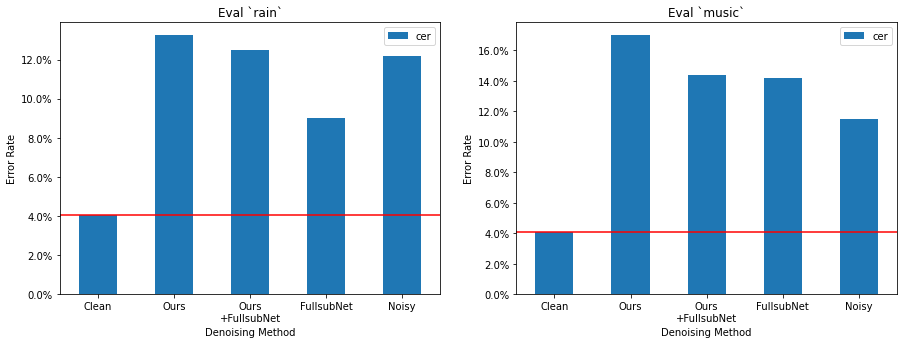

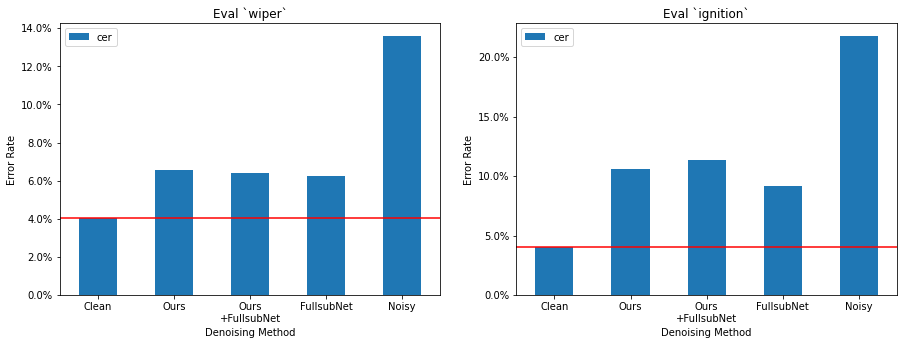

In [11]:
sort_key = { 'gt': 0, 'noisetasnet': 1, 'noisetas_fullsub': 2, 'fullsubnet': 3, 'mix': 4 }
proper_key = {
    'gt': 'Clean', 
    'noisetasnet': 'Ours', 
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'fullsubnet': 'FullsubNet',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 0})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.0406, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        # plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

### Denoising MM v3 - Wav2Vec2 June 17th (v3 Chan)

In [12]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_mm_denoising_v3/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetas_fullsub' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [13]:
ci_avsr_df = pd.read_csv('ci-avsr-result.csv')
ci_avsr_df = ci_avsr_df[['noise_type', 'denoise_type', 'mm_cer']].rename({'mm_cer': 'cer'}, axis=1)
df = pd.concat([df, ci_avsr_df])

In [14]:
sort_key = { 'gt': 0, 'noisetasnet': 1, 'noisetas_fullsub': 2, 'fullsubnet': 3, 'mix': 4 }
proper_key = {
    'gt': 'Clean', 
    'noisetasnet': 'Ours', 
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'fullsubnet': 'FullsubNet',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

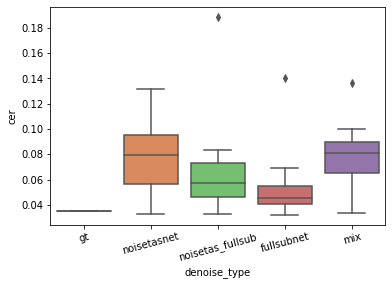

In [15]:
ax = sns.boxplot(x="denoise_type", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 15})
plt.savefig(f'mm_asr_denoising_3.png', bbox_inches='tight')

/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


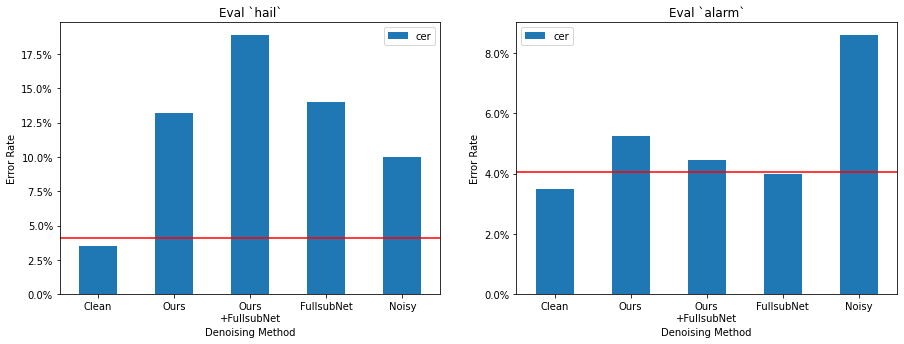

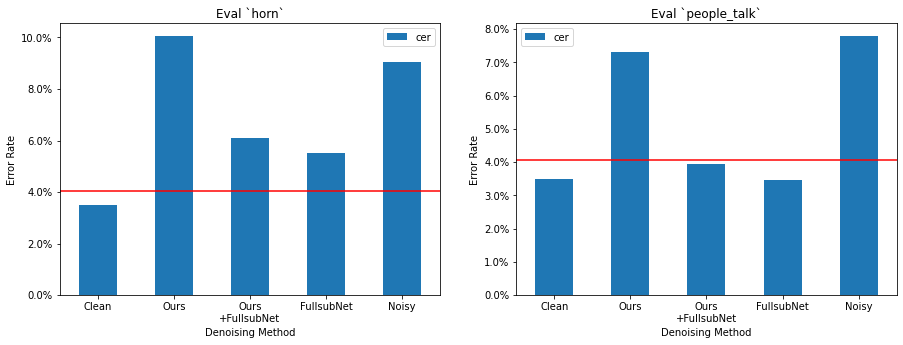

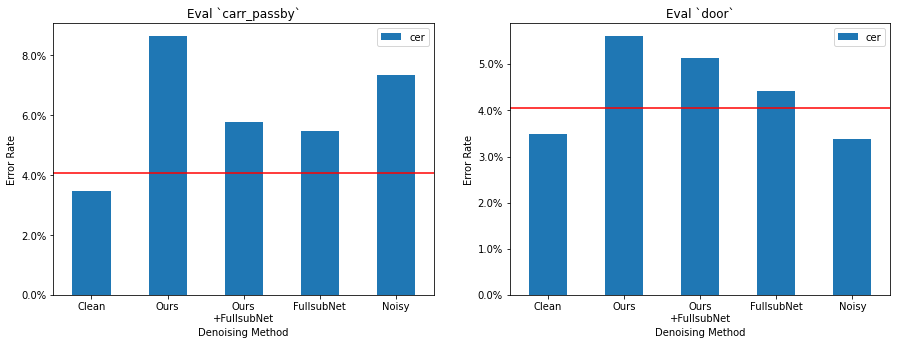

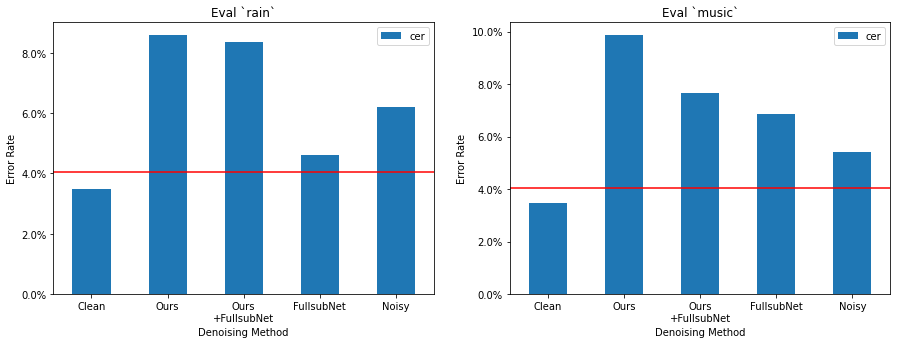

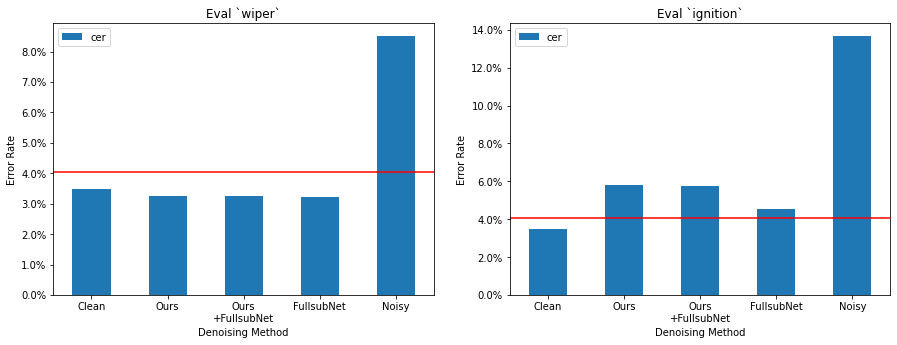

In [16]:
for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 0})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.0406, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        # plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

### Denoising v3 - Wav2Vec2 June 17th (v3 Chan)

In [17]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_denoising_v3/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'noisetas_fullsub' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'noisetas_fullsub'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [18]:
ci_avsr_df = pd.read_csv('ci-avsr-result.csv')
df = pd.concat([df, ci_avsr_df])

In [19]:
sort_key = { 'gt': 0, 'noisetasnet': 1, 'noisetas_fullsub': 2, 'fullsubnet': 3, 'mix': 4 }
proper_key = {
    'gt': 'Clean', 
    'noisetasnet': 'Ours', 
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'fullsubnet': 'FullsubNet',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

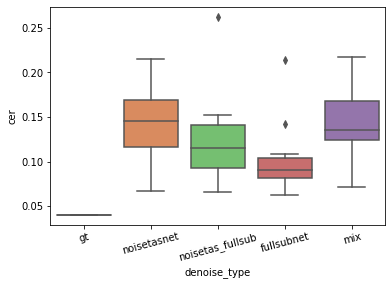

In [20]:
ax = sns.boxplot(x="denoise_type", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 15})
plt.savefig(f'ao_asr_denoising_3.png', bbox_inches='tight')

/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


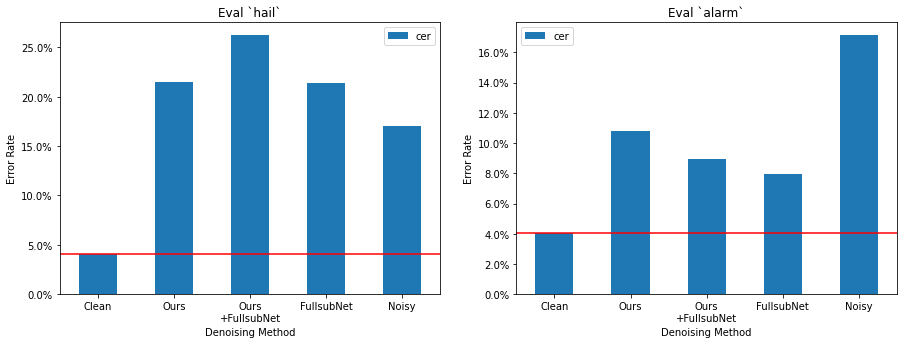

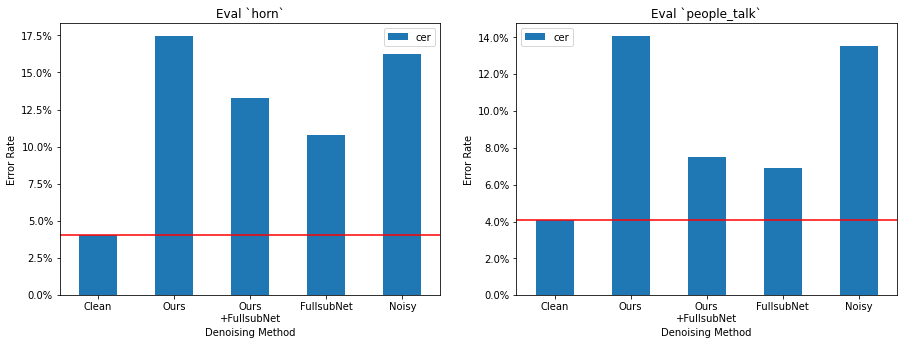

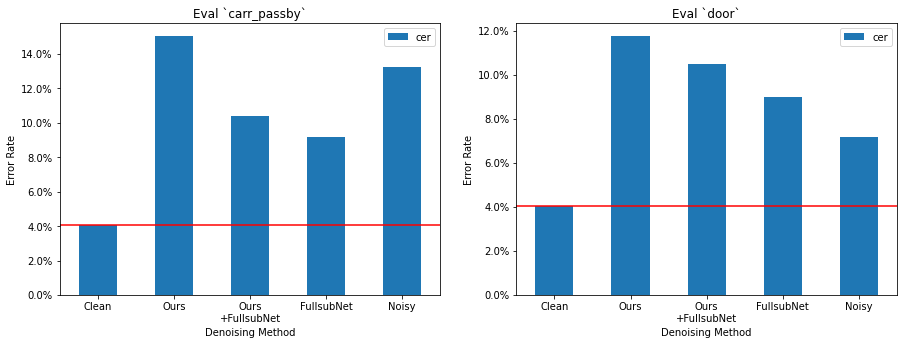

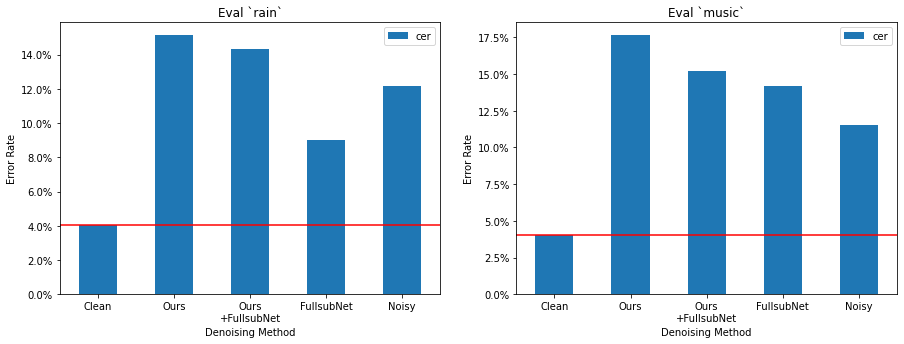

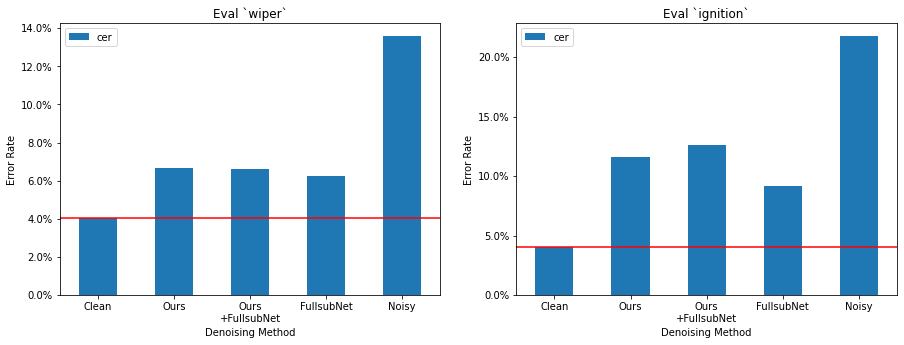

In [54]:
sort_key = { 'gt': 0, 'noisetasnet': 1, 'noisetas_fullsub': 2, 'fullsubnet': 3, 'mix': 4 }
proper_key = {
    'gt': 'Clean', 
    'noisetasnet': 'Ours', 
    'noisetas_fullsub': 'Ours\n+FullsubNet',
    'fullsubnet': 'FullsubNet',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 0})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.0406, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

# Eval v2

### Denoising v2 - MM Wav2Vec2 June 16th (v2 Chan)

In [89]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_mm_denoising_v2/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'eval_denoised' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'eval_denoised'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [90]:
sort_key = { 'gt': 0, 'eval': 1, 'eval_denoised': 2, 'denoised': 3, 'mix': 4 }
proper_key = {
    'gt': 'Clean', 
    'eval': 'Ours', 
    'eval_denoised': 'Ours\n+FullsubNet',
    'denoised': 'FullsubNet',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

[None, None, None, None, None, None, None, None, None, None]

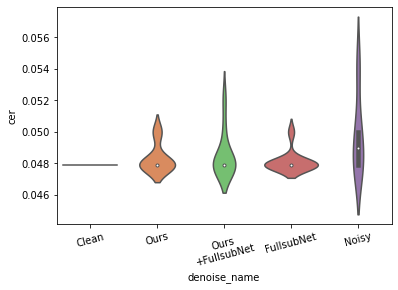

In [91]:
ax = sns.violinplot(x="denoise_name", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 15})

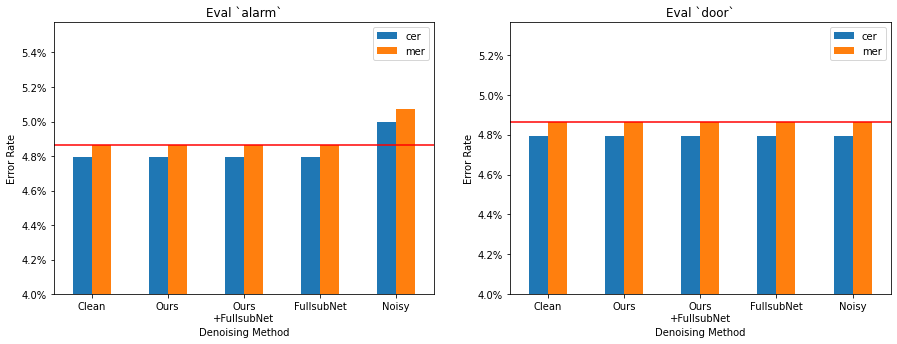

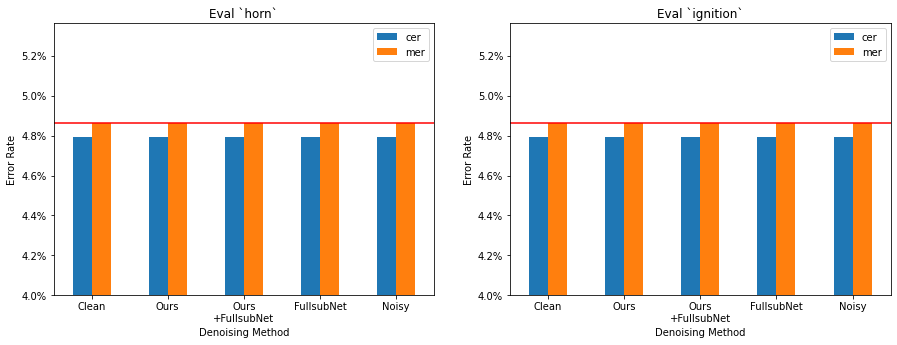

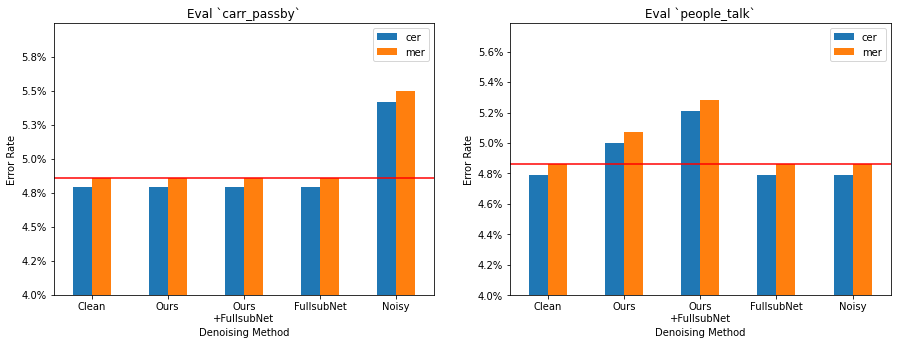

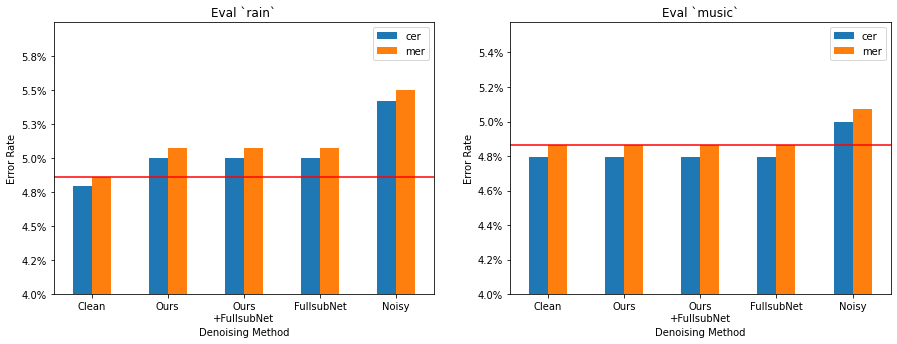

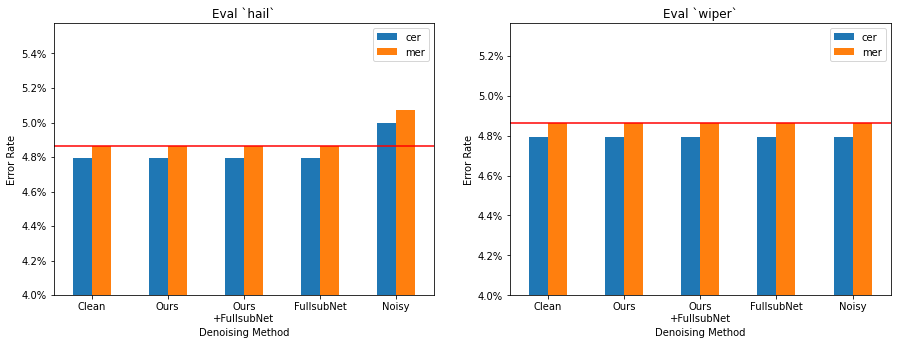

In [58]:
for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer', 'mer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 0})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.048626, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.set_ylim(0.04,plot_df['mer'].max() + 0.005)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

### Denoising v2 - Wav2Vec2 June 16th (v2 Chan)

In [86]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_denoising_v2/*/eval_results.json'):
    try:
        folder_name = eval_path.split('/')[-2]
        if 'eval_denoised' in folder_name:
            noise_type = '_'.join(folder_name.split('_')[:-2])
            denoise_type = 'eval_denoised'
        else:
            noise_type = '_'.join(folder_name.split('_')[:-1])
            denoise_type = folder_name.split('_')[-1]

        result = json.load(open(eval_path, 'r'))
        cer, mer = result['eval_cer'], result['eval_mer']

        result_buffer['noise_type'].append(noise_type)
        result_buffer['denoise_type'].append(denoise_type)
        result_buffer['cer'].append(cer)
        result_buffer['mer'].append(mer)
    except:
        pass
df = pd.DataFrame(result_buffer)

In [87]:
sort_key = { 'gt': 0, 'eval': 1, 'eval_denoised': 2, 'denoised': 3, 'mix': 4 }
proper_key = {
    'gt': 'Clean', 
    'eval': 'Ours', 
    'eval_denoised': 'Ours\n+FullsubNet',
    'denoised': 'FullsubNet',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

[None, None, None, None, None, None, None, None, None, None]

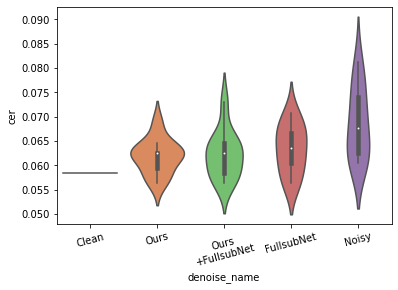

In [88]:
ax = sns.violinplot(x="denoise_name", y="cer", data=df.sort_values('denoise_key'), palette="muted")
plt.setp(ax.get_xticklabels(), **{"rotation" : 15})

/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


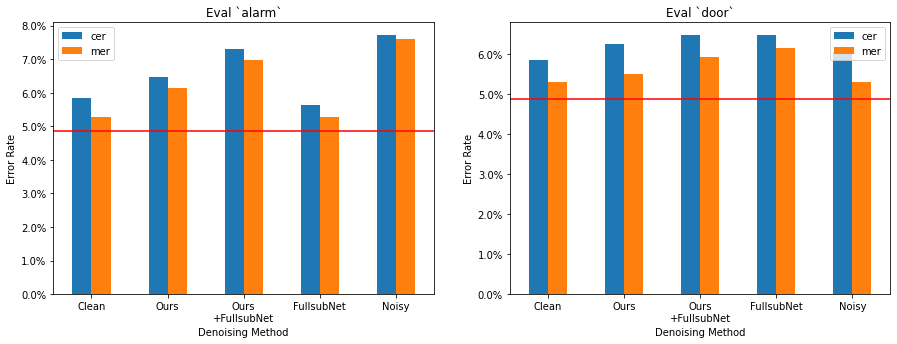

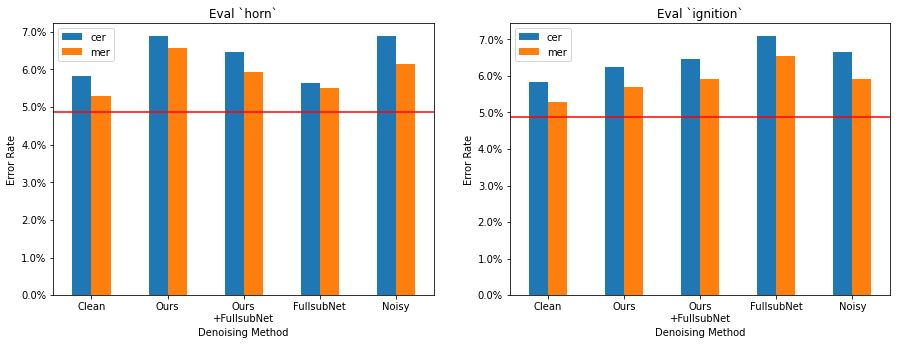

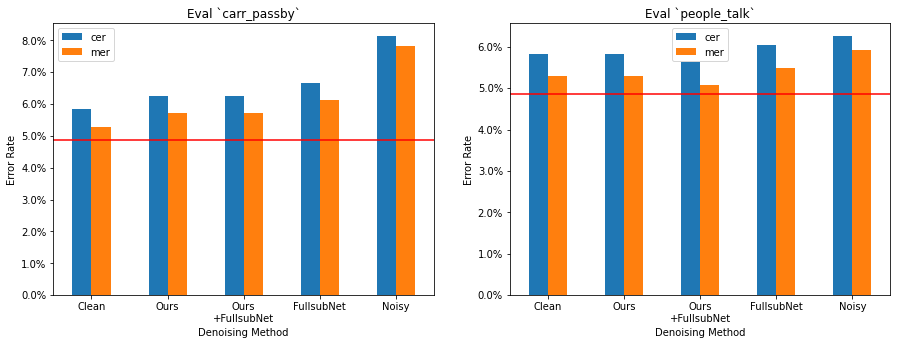

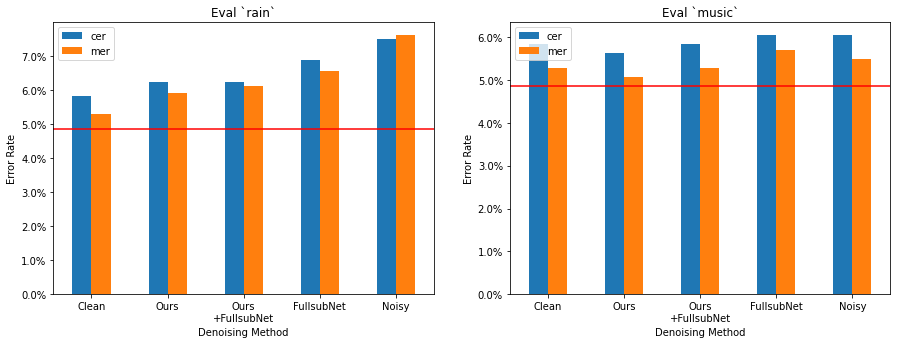

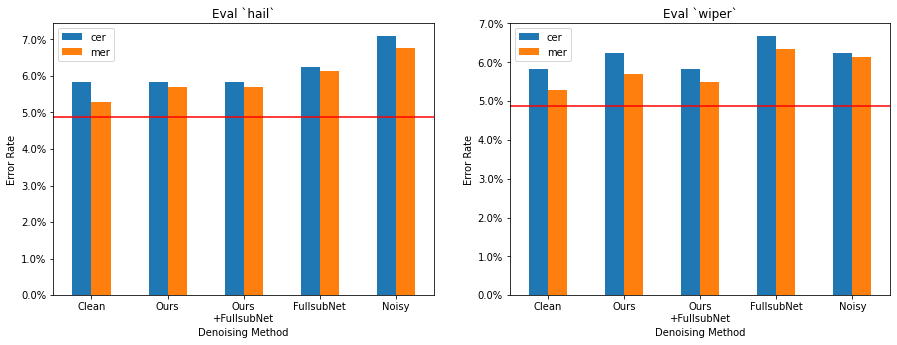

In [70]:
for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer', 'mer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 0})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.048626, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

# Eval v1

### Denoising v1.1 - Wav2Vec2 June 8th

In [61]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_denoising_v1.1/*/eval_results.json'):
    folder_name = eval_path.split('/')[-2]
    if 'eval_denoised' in folder_name:
        noise_type = '_'.join(folder_name.split('_')[:-2])
        denoise_type = 'eval_denoised'
    else:
        noise_type = '_'.join(folder_name.split('_')[:-1])
        denoise_type = folder_name.split('_')[-1]

    result = json.load(open(eval_path, 'r'))
    cer, mer = result['eval_cer'], result['eval_mer']
    
    result_buffer['noise_type'].append(noise_type)
    result_buffer['denoise_type'].append(denoise_type)
    result_buffer['cer'].append(cer)
    result_buffer['mer'].append(mer)
df = pd.DataFrame(result_buffer)

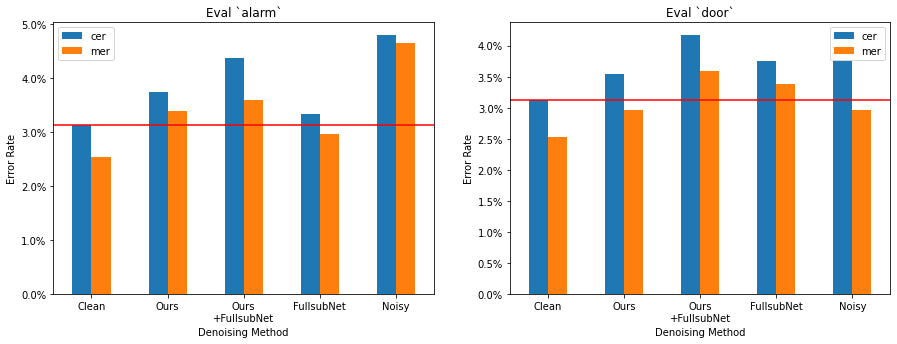

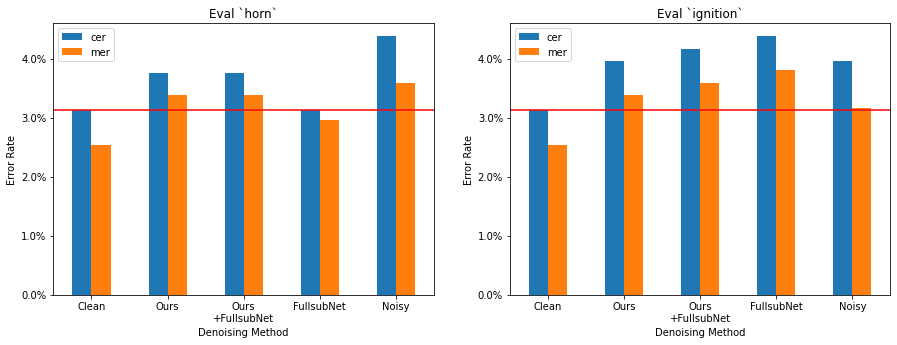

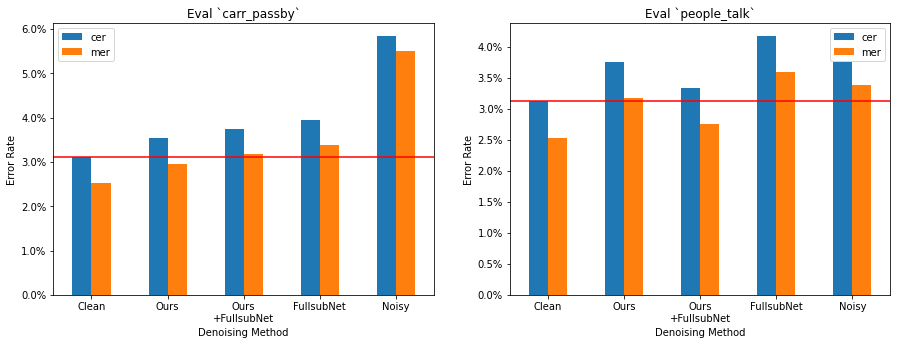

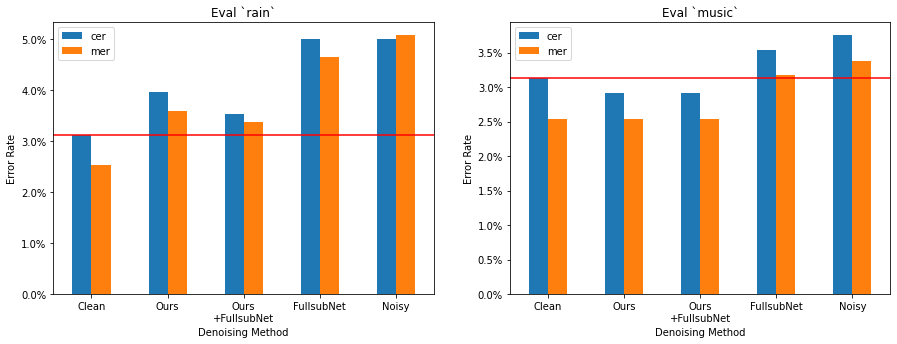

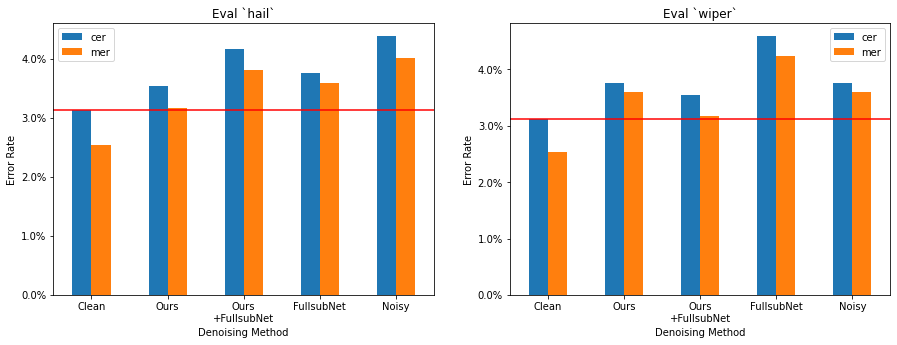

In [17]:
sort_key = { 'gt': 0, 'eval': 1, 'eval_denoised': 2, 'denoised': 3, 'mix': 4 }
proper_key = {
    'gt': 'Clean', 
    'eval': 'Ours', 
    'eval_denoised': 'Ours\n+FullsubNet',
    'denoised': 'FullsubNet',
    'mix': 'Noisy'
}

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer', 'mer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 0})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.031250, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')
        plt.show()

### Denoising v1 - Wav2Vec2 June 7th

In [14]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_denoising_v1/*/eval_results.json'):
    folder_name = eval_path.split('/')[-2]
    if 'eval_denoised' in folder_name:
        noise_type = '_'.join(folder_name.split('_')[:-2])
        denoise_type = 'eval_denoised'
    else:
        noise_type = '_'.join(folder_name.split('_')[:-1])
        denoise_type = folder_name.split('_')[-1]

    result = json.load(open(eval_path, 'r'))
    cer, mer = result['eval_cer'], result['eval_mer']
    
    result_buffer['noise_type'].append(noise_type)
    result_buffer['denoise_type'].append(denoise_type)
    result_buffer['cer'].append(cer)
    result_buffer['mer'].append(mer)
df = pd.DataFrame(result_buffer)

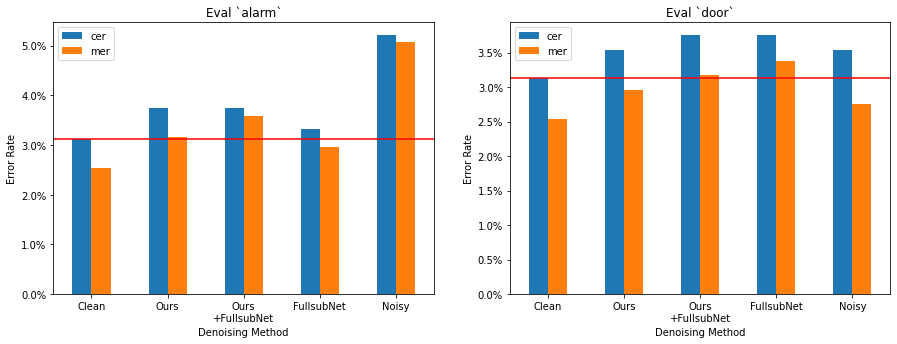

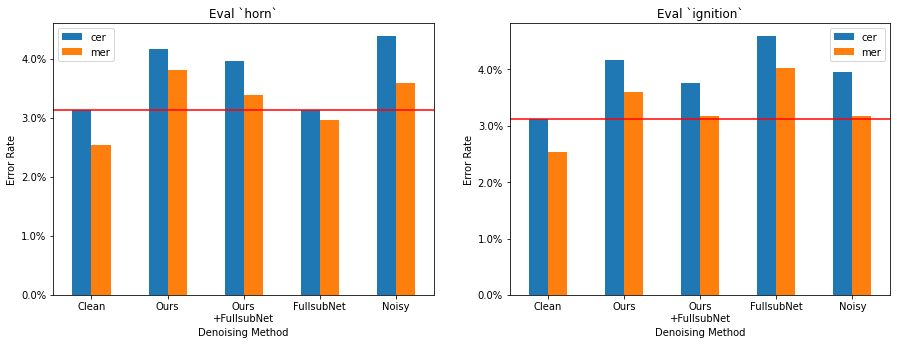

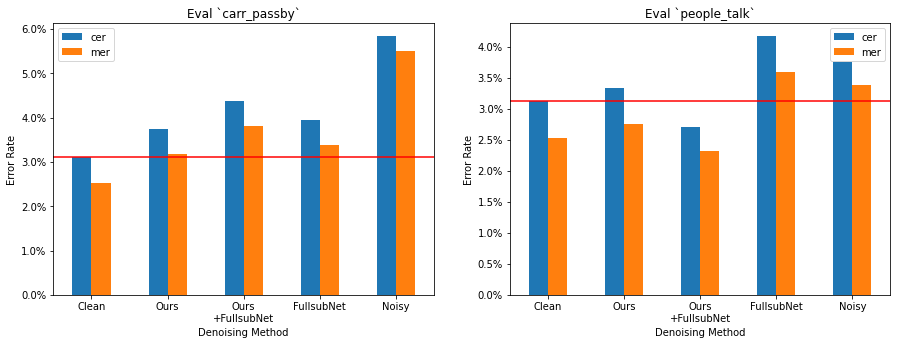

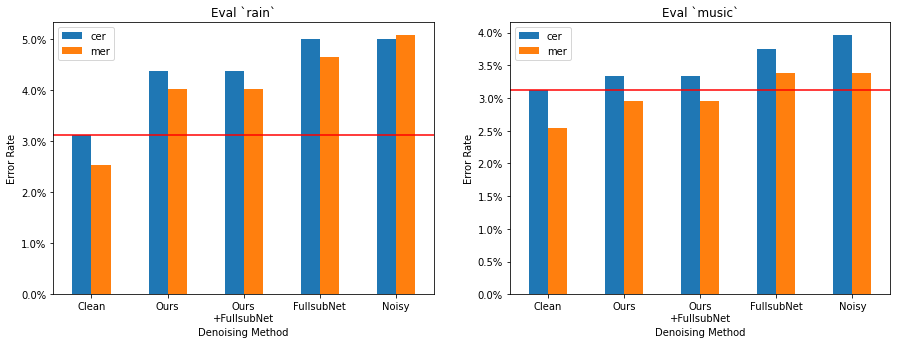

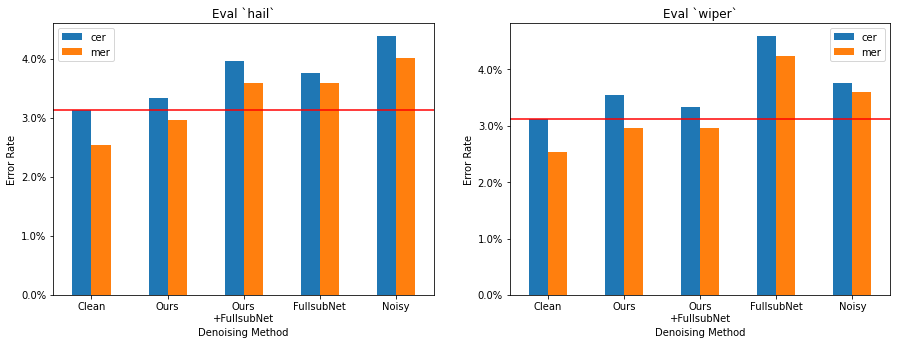

In [15]:
sort_key = { 'gt': 0, 'eval': 1, 'eval_denoised': 2, 'denoised': 3, 'mix': 4 }
proper_key = { 'gt': 'Clean', 'eval': 'Ours', 'eval_denoised': 'Ours\n+FullsubNet', 'denoised': 'FullsubNet', 'mix': 'Noisy' }

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer', 'mer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 0})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.031250, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')

# Denoising v0

In [ ]:
result_buffer = { 'noise_type': [], 'denoise_type': [], 'cer': [], 'mer': [] }
for eval_path in glob.glob('./save_denoising_v0/*/eval_results.json'):
    folder_name = eval_path.split('/')[-2]
    if 'eval_denoised' in folder_name:
        noise_type = '_'.join(folder_name.split('_')[:-2])
        denoise_type = 'eval_denoised'
    else:
        noise_type = '_'.join(folder_name.split('_')[:-1])
        denoise_type = folder_name.split('_')[-1]

    result = json.load(open(eval_path, 'r'))
    cer, mer = result['eval_cer'], result['eval_mer']
    
    result_buffer['noise_type'].append(noise_type)
    result_buffer['denoise_type'].append(denoise_type)
    result_buffer['cer'].append(cer)
    result_buffer['mer'].append(mer)
df = pd.DataFrame(result_buffer)

In [23]:
df.loc[df['noise_type'] == 'carr_passby',:]

,noise_type,denoise_type,cer,mer
5,carr_passby,eval_denoised,0.043750,0.042283
7,carr_passby,eval,0.045833,0.044397
13,carr_passby,gt,0.037500,0.035941
36,carr_passby,denoised,0.039583,0.038055
46,carr_passby,mix,0.050000,0.052854


/home/samuel/anaconda2/envs/env_py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


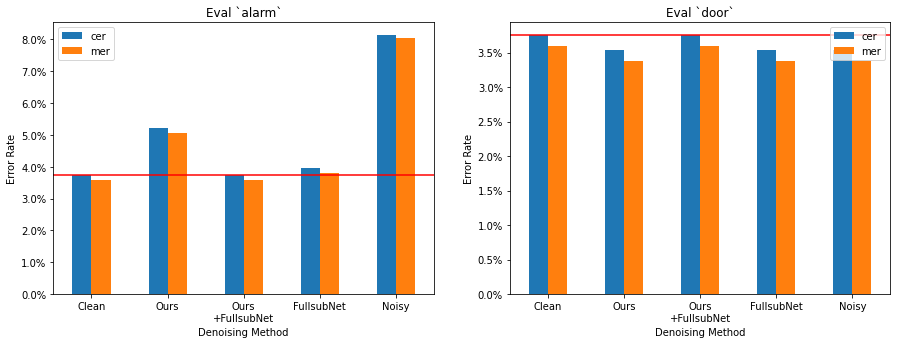

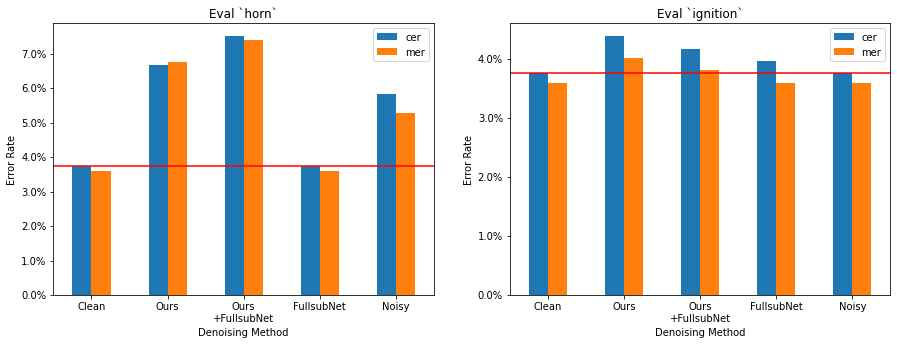

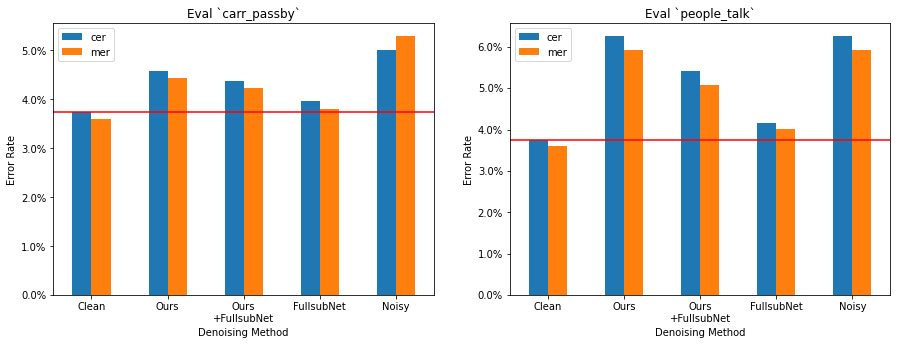

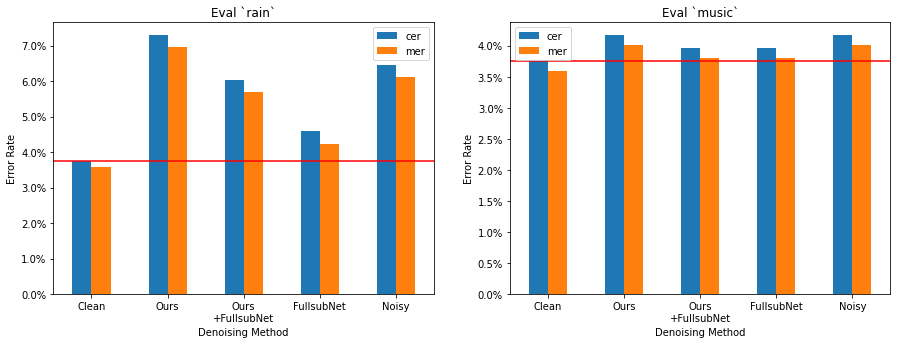

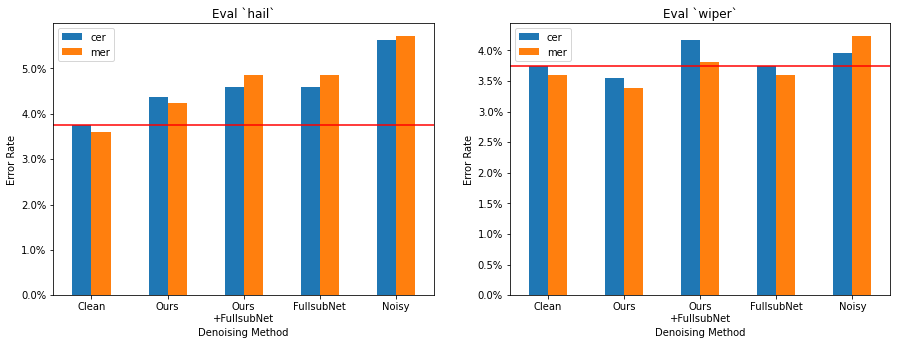

In [8]:
sort_key = { 'gt': 0, 'eval': 1, 'eval_denoised': 2, 'denoised': 3, 'mix': 4 }
proper_key = { 'gt': 'Clean', 'eval': 'Ours', 'eval_denoised': 'Ours\n+FullsubNet', 'denoised': 'FullsubNet', 'mix': 'Noisy' }

df['denoise_key'] = df['denoise_type'].apply(lambda x: sort_key[x])
df['denoise_name'] = df['denoise_type'].apply(lambda x: proper_key[x])

for i, noise_type in enumerate(df['noise_type'].unique()):
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    ax = axs[i % 2]
    plot_df = df.loc[df['noise_type'] == noise_type,:].sort_values('denoise_key')
    plot_df.plot.bar(x='denoise_name', y=['cer', 'mer'], ax=ax)
    
    plt.setp(ax.get_xticklabels(), **{"rotation" : 0})
    ax.set_title(f'Eval `{noise_type}`')
    ax.axhline(y=0.0375, color='r', linestyle='-')
    ax.set_xlabel('Denoising Method')
    ax.set_ylabel('Error Rate')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
    
    if i % 2 == 1:
        plt.savefig(f'asr_denoising_{i//2}.png', bbox_inches='tight')

In [4]:
df.to_csv('result_denoising.csv', index=True)